### Housing Price Prediction Assignment 

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Importing important libraries and have a look at the dataset and understand the size, attribute names etc.

In [171]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [172]:
#Reading the dataset
Housing = pd.read_csv("C:\\a\\Advance_regression\\A_train.csv")
Housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [173]:
#Checking the shape of Dataframe
Housing.shape

(1460, 81)

In [174]:
# Checking summary of the dataset: 1460 rows, 81 columns, null values in columns
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Data Cleaning

In [175]:
#Dropping Id column as it's of no use
Housing.drop('Id', axis =1, inplace = True)

In [176]:
#Checking the percentage of null values in columns
round(100*(Housing.isnull().sum()/len(Housing.index)),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [177]:
#Dropping the columns having more then 50% null values
null_cols = Housing.columns[round(100*Housing.isnull().sum()/len(Housing.index),2)>50]
null_cols

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [178]:
Housing.drop(null_cols, axis = 1, inplace = True)

In [179]:
#Checking the shape of dataframe after dropping columns in null_cols
Housing.shape

(1460, 76)

In [180]:
#Checking the datatypes of columns
Housing.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


# Data Preparation

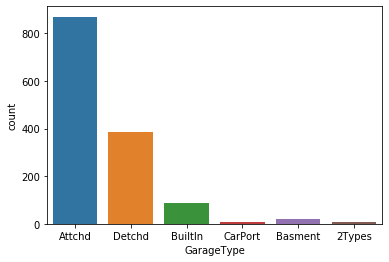

In [182]:
#Plotting countplot of variable GarageType to check number of occurance of certain categories
sns.countplot(Housing['GarageType'])

In [183]:
#Checking null values in column GarageType
Housing['GarageType'].isnull().sum()

81

In [184]:
#Imputing the null values by mode of column GarageType
Housing['GarageType'].fillna(Housing['GarageType'].mode().iloc[0], inplace = True)



In [185]:
#Replacing least occuring values in GarageType by others
Housing['GarageType'].replace([['CarPort','Basment','2Types']], 'Others', inplace = True)

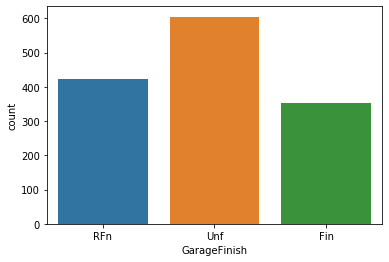

In [186]:
#Plotting countplot of variable GarageFinish to check number of occurance of certain categories
sns.countplot(Housing['GarageFinish'])

In [187]:
#Checking null values in column GarageType
Housing['GarageFinish'].isnull().sum()

81

In [188]:
#Imputing the null values by mode of column GarageFinish
Housing['GarageFinish'].fillna(Housing['GarageFinish'].mode().iloc[0], inplace = True)

In [189]:
#checking number of occurance of certain categories in columns GarageQual
Housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [190]:
#Checking null values in column GarageQual
Housing['GarageQual'].isnull().sum()

81

In [191]:
#Imputing the null values by mode of column GarageQual
Housing['GarageQual'].fillna(Housing['GarageQual'].mode().iloc[0], inplace = True)

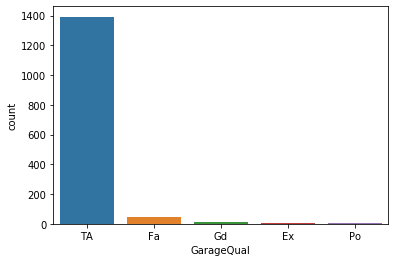

In [192]:
#Plotting countplot of variable GarageQual to check number of occurance of certain categories
sns.countplot(Housing['GarageQual'])

In [193]:
#Replacing least occuring values in GarageQual by others
Housing['GarageQual'].replace([['Gd','Po','Ex']], 'Others', inplace = True)

In [194]:
#Checking null values in column GarageCond
Housing['GarageCond'].isnull().sum()

81

In [195]:
#Imputing the null values by mode of column GarageCond
Housing['GarageCond'].fillna(Housing['GarageCond'].mode().iloc[0],inplace = True)

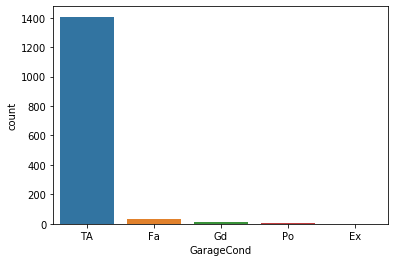

In [196]:
#Plotting countplot of variable GarageCond to check number of occurance of certain categories
sns.countplot(Housing['GarageCond'])

In [197]:
#Replacing least occuring values in GarageType by others
Housing['GarageCond'].replace([['Gd','Po','Ex']], 'Others', inplace = True)

In [198]:
#Checking number of occurance of certain categories in columns BsmtCond
Housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [199]:
#Checking null values in column BsmtCond
Housing['BsmtCond'].isnull().sum()

37

In [200]:
#Imputing the null values by mode of column BsmtCond
Housing['BsmtCond'].fillna(Housing['BsmtCond'].mode().iloc[0],inplace = True)

In [201]:
#Checking number of occurance of certain categories in columns BsmtExposure
Housing["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [202]:
#Checking null values in column BsmtExposure
Housing["BsmtExposure"].isnull().sum()

38

In [203]:
#Imputing the null values by mode of column BsmtExposure
Housing["BsmtExposure"].fillna(Housing["BsmtExposure"].mode().iloc[0], inplace = True)

In [204]:
#Imputing the null values by mode of column BsmtFinType1
Housing["BsmtFinType1"].fillna(Housing["BsmtFinType1"].mode().iloc[0], inplace = True)

In [205]:
#Imputing the null values by mode of column BsmtFinType2
Housing["BsmtFinType2"].fillna(Housing["BsmtFinType2"].mode().iloc[0], inplace = True)

In [206]:
#Imputing the null values by mode of column LotFrontage
Housing["LotFrontage"].fillna(Housing["LotFrontage"].median(), inplace = True)

In [207]:
#Checking min value in column YearBuilt
Housing.YearBuilt.min()

1872

In [208]:
#Checking max value in column YearRemodAdd
Housing.YearRemodAdd.max()

2010

In [209]:
#Checking max value in column GarageYrBlt
Housing.GarageYrBlt.max()

2010.0

In [210]:
#Checking max value in column YrSold
Housing.YrSold.max()

2010

In [211]:
#Convert year columns to age so could be used as a categorical value
Housing['YearBuilt_1'] = Housing.YearBuilt.max()-Housing.YearBuilt
Housing['YearRemodAdd_1'] = Housing.YearRemodAdd.max()-Housing.YearRemodAdd
Housing['GarageYrBlt_1'] = Housing.GarageYrBlt.max()-Housing.GarageYrBlt
Housing['YrSold_1'] = Housing.YrSold.max()-Housing.YrSold
#Housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_1','YearRemodAdd_1',
            # 'GarageYrBlt_1','YrSold_1']].head(10)
Housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7

In [212]:
#Checking null values in column YearBuilt_1
Housing['YearBuilt_1'].isnull().sum()

0

In [213]:
#Checking null values in column YearRemodAdd_1
Housing['YearRemodAdd_1'].isnull().sum()

0

In [214]:
#Checking null values in column GarageYrBlt_1
Housing['GarageYrBlt_1'].isnull().sum()

81

In [215]:
#Dropping columns GarageYrBlt,YrSold,YearBuilt,YearRemodAdd
Housing.drop(['GarageYrBlt','YrSold','YearBuilt','YearRemodAdd'], axis = 1, inplace = True)

In [216]:
#Converting type to object so that columns could be used as a categorical columns
Housing[['GarageYrBlt_1','YrSold_1','YearBuilt_1','YearRemodAdd_1']] = Housing[['GarageYrBlt_1','YrSold_1','YearBuilt_1','YearRemodAdd_1']].astype('object')

In [217]:
#Imputing the null values by mode of column GarageYrBlt_1
Housing['GarageYrBlt_1'].fillna(Housing['GarageYrBlt_1'].mode().iloc[0],inplace = True)

In [218]:
#As percentage of null values in remaining columns is less dropping them.
Housing.dropna(axis = 0, inplace = True)

In [219]:
Frame_20 = Housing.copy()

In [220]:
#Creating bins for column YearBuilt_1 with bin values recent,new and old

pd.options.mode.chained_assignment = None
bins = [0,25,80,140]
group_names = ['recent','new', 'old']
Frame_20['YearBuilt_age'] = pd.cut(Frame_20['YearBuilt_1'], bins , labels = group_names)
Frame_20.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   
6          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   
6     1Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   
6     VinylSd      Stone       186.0        Gd        TA      PConc       Ex   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   
6       TA           Av          GLQ        1369          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   
6        317         1686    GasA        Ex          Y      SBrkr      1694   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   
6         0             0       1694             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   
6         0             3             1          Gd             7        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
1           1          TA     Attchd          RFn           2         460   
2           1          TA     Attchd          RFn           2         608   
3           1          Gd     De

In [221]:
#Creating bins for column YearRemodAdd_1 with bin values recent,new and old

pd.options.mode.chained_assignment = None
bins = [0,20,40,65]
group_names = ['recent','new', 'old']
Frame_20['YearRemodAdd_age'] = pd.cut(Frame_20['YearRemodAdd_1'], bins , labels = group_names)
Frame_20.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   
6          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   
6     1Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   
6     VinylSd      Stone       186.0        Gd        TA      PConc       Ex   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   
6       TA           Av          GLQ        1369          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   
6        317         1686    GasA        Ex          Y      SBrkr      1694   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   
6         0             0       1694             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   
6         0             3             1          Gd             7        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
1           1          TA     Attchd          RFn           2         460   
2           1          TA     Attchd          RFn           2         608   
3           1          Gd     De

In [222]:
#Creating bins for column GarageYrBlt_1 with bin values recent,new and old


pd.options.mode.chained_assignment = None
bins = [0,35,70,115]
group_names = ['recent','new', 'old']
Frame_20['GarageYrBlt_age'] = pd.cut(Frame_20['GarageYrBlt_1'], bins , labels = group_names)
Frame_20.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   
6          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   
6     1Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   
6     VinylSd      Stone       186.0        Gd        TA      PConc       Ex   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   
6       TA           Av          GLQ        1369          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   
6        317         1686    GasA        Ex          Y      SBrkr      1694   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   
6         0             0       1694             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   
6         0             3             1          Gd             7        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
1           1          TA     Attchd          RFn           2         460   
2           1          TA     Attchd          RFn           2         608   
3           1          Gd     De

In [223]:
#Creating bins for column YrSold_1 with bin values recent,new and old

pd.options.mode.chained_assignment = None
bins = [0,1,2,5]
group_names = ['recent','new', 'old']
Frame_20['YrSold_age'] = pd.cut(Frame_20['YrSold_1'], bins , labels = group_names)
Frame_20.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   
6          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   
6     1Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   
6     VinylSd      Stone       186.0        Gd        TA      PConc       Ex   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   
6       TA           Av          GLQ        1369          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   
6        317         1686    GasA        Ex          Y      SBrkr      1694   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   
6         0             0       1694             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   
6         0             3             1          Gd             7        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
1           1          TA     Attchd          RFn           2         460   
2           1          TA     Attchd          RFn           2         608   
3           1          Gd     De

In [224]:
#Dropping columns YrSold_1,GarageYrBlt_1,YearRemodAdd_1,YearBuilt_1 as binning has been done and new columns hab
#been created for them
Frame_20.drop(['YrSold_1','GarageYrBlt_1','YearRemodAdd_1','YearBuilt_1'], axis = 1 , inplace = True)

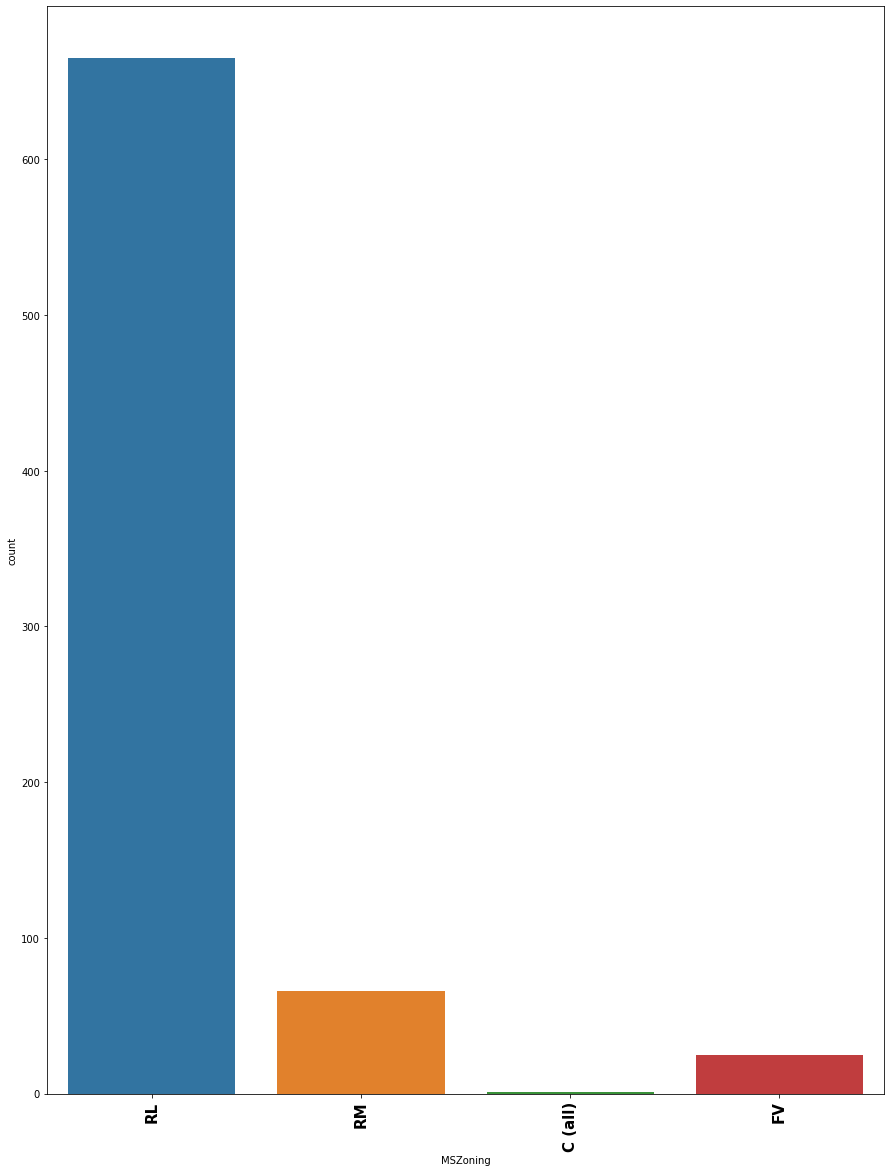

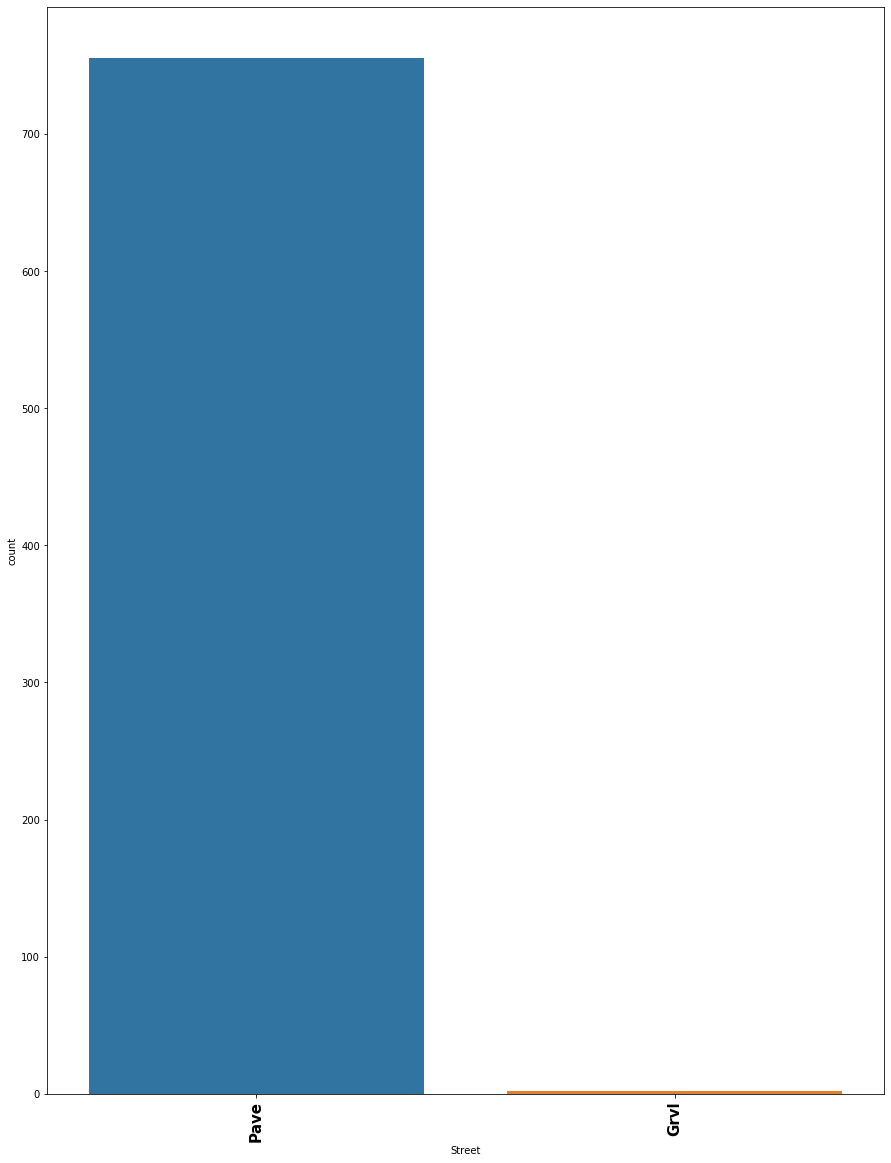

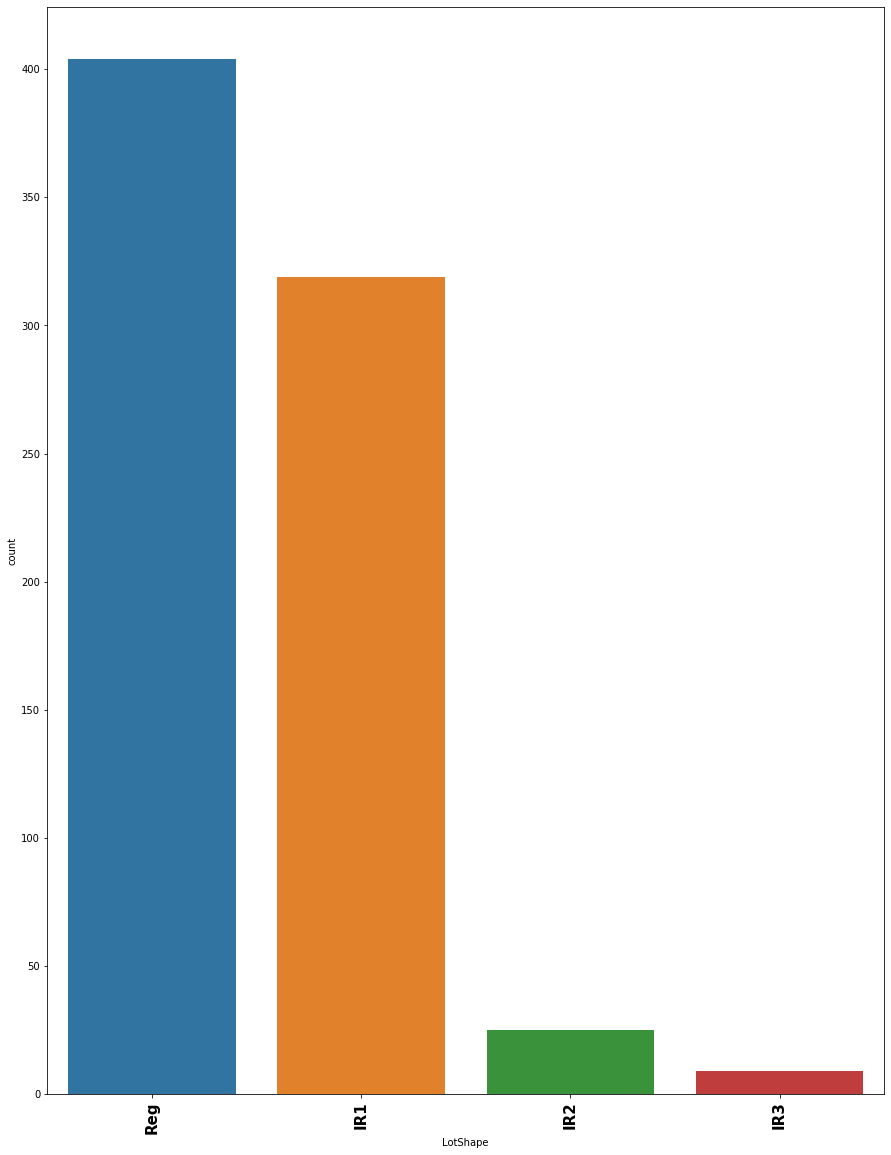

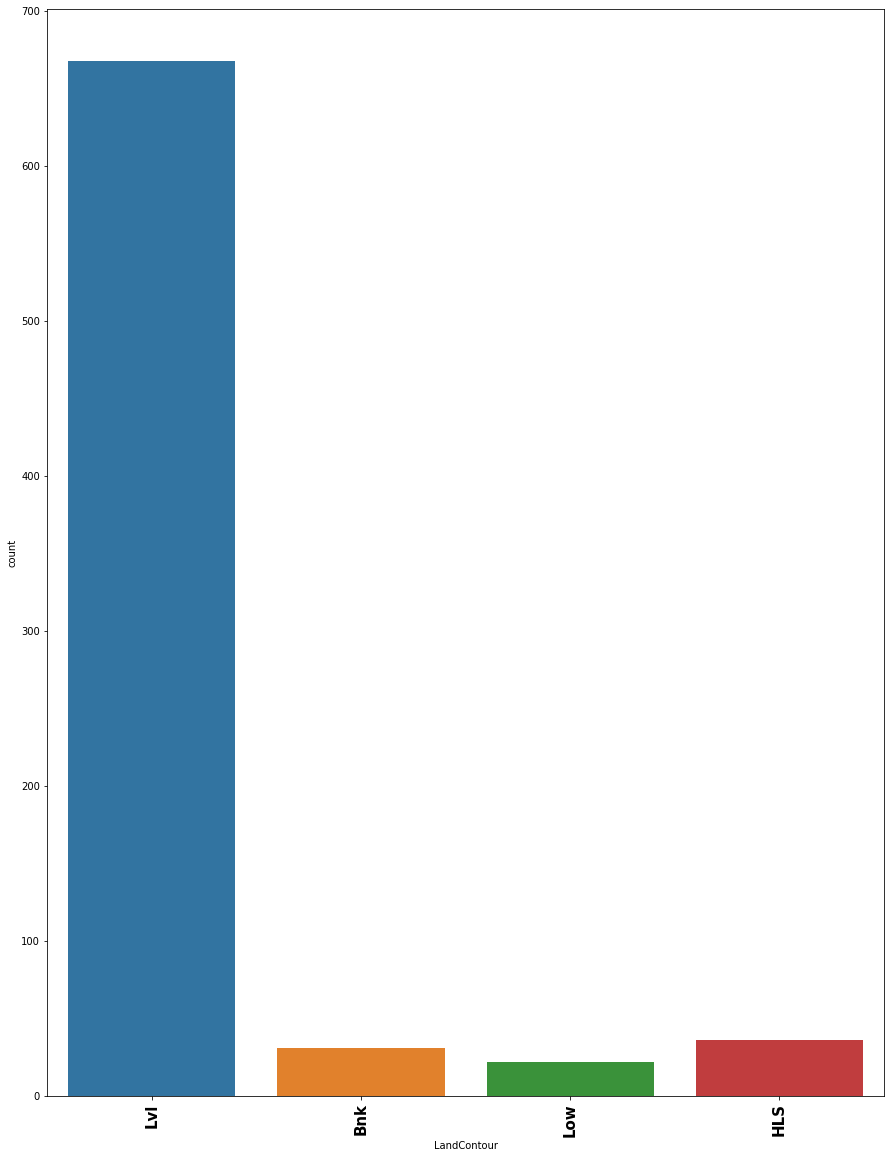

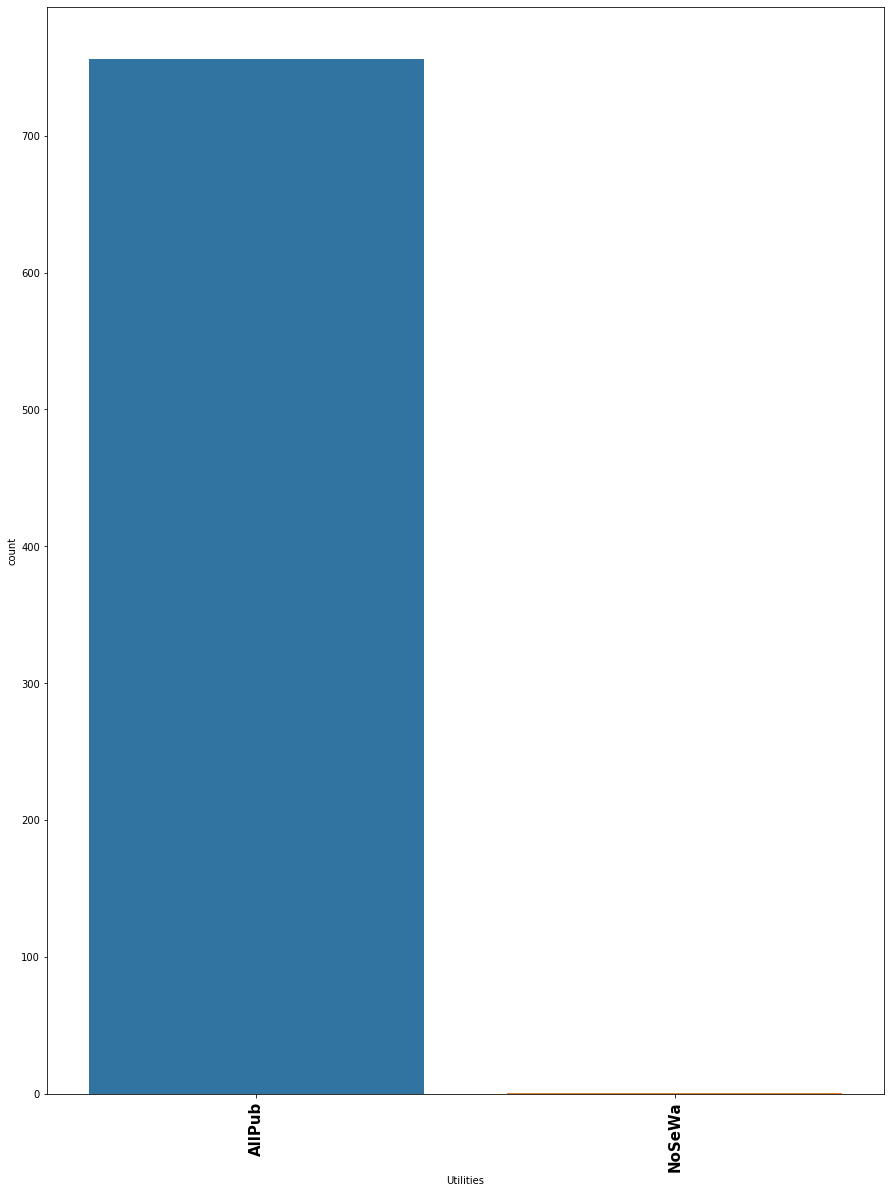

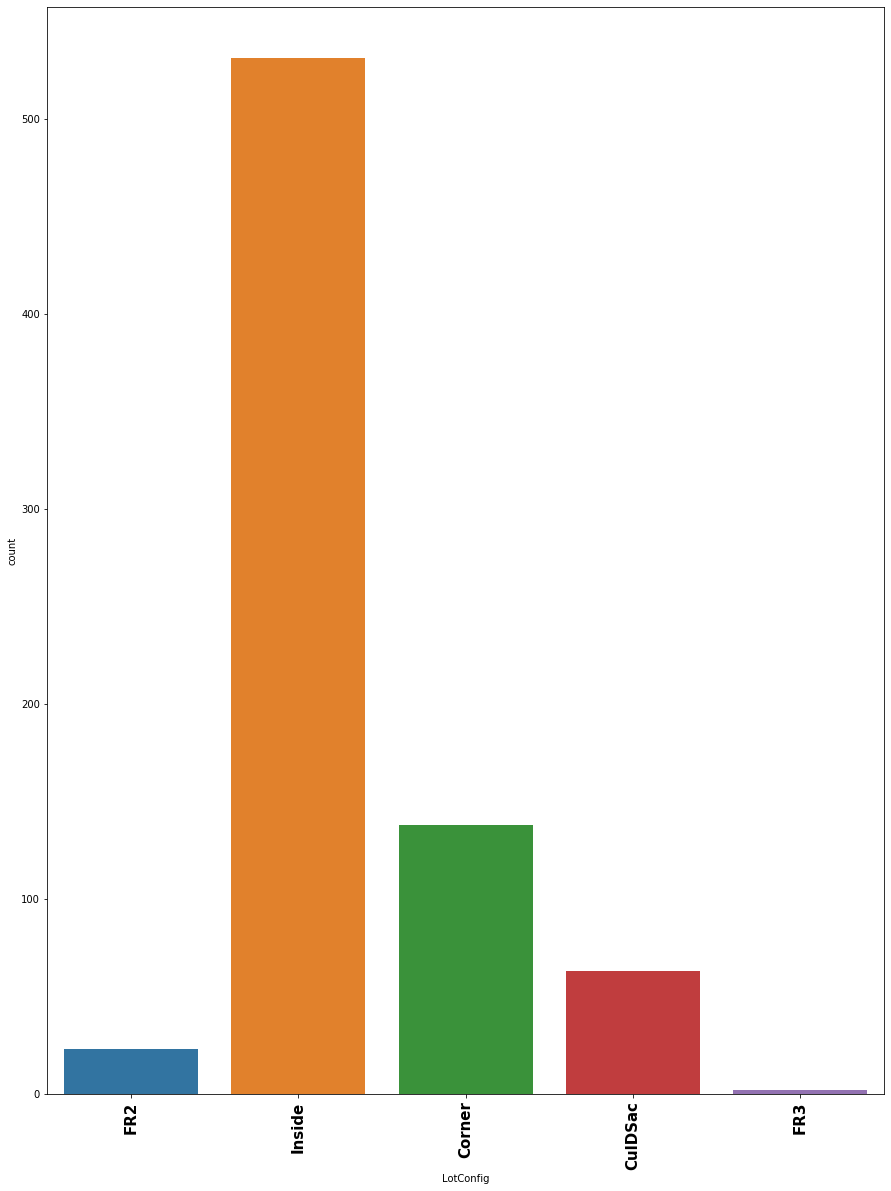

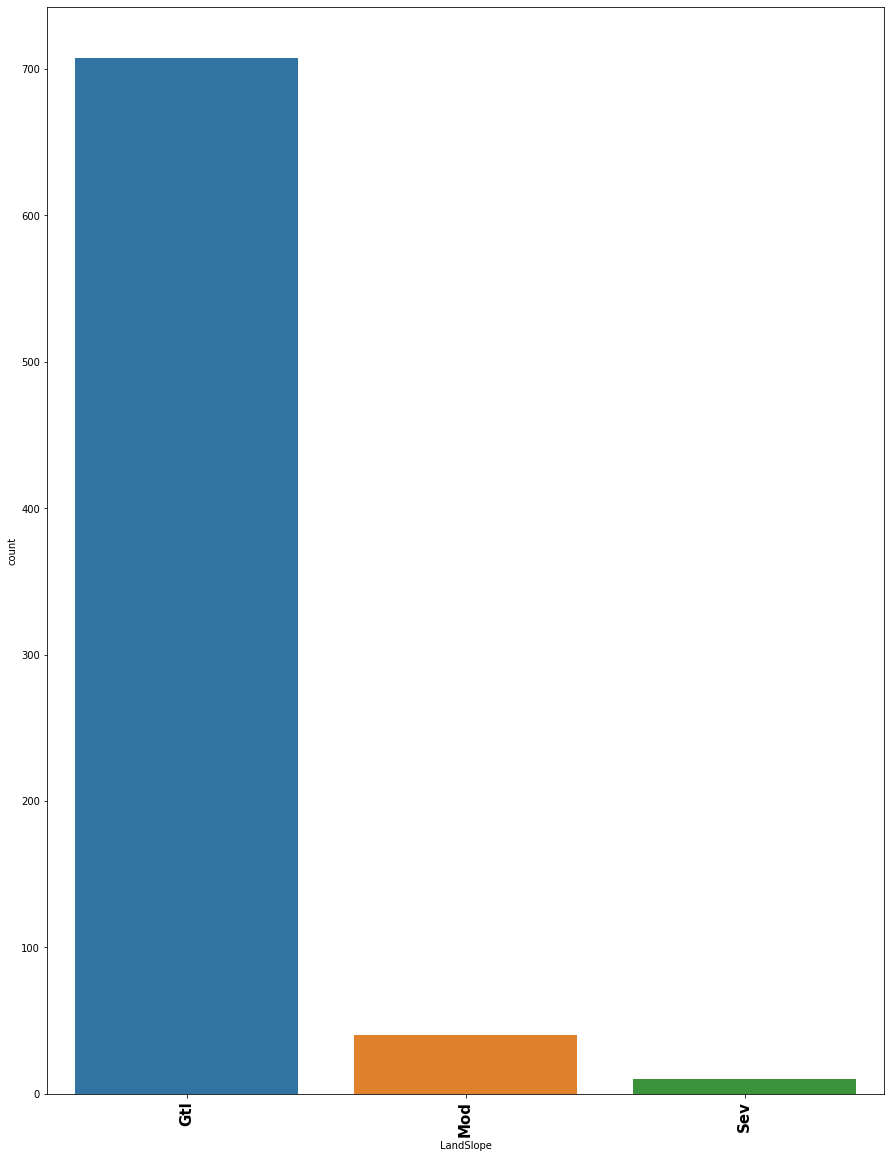

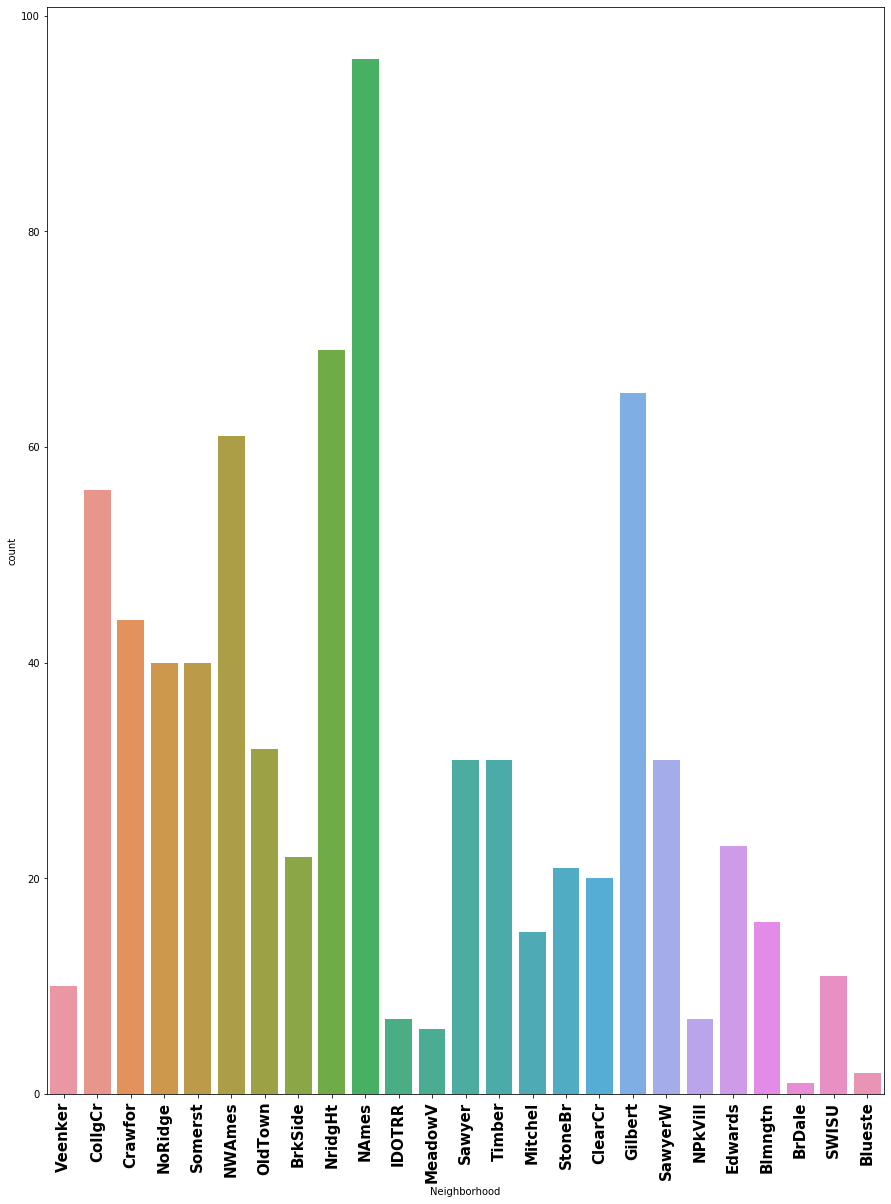

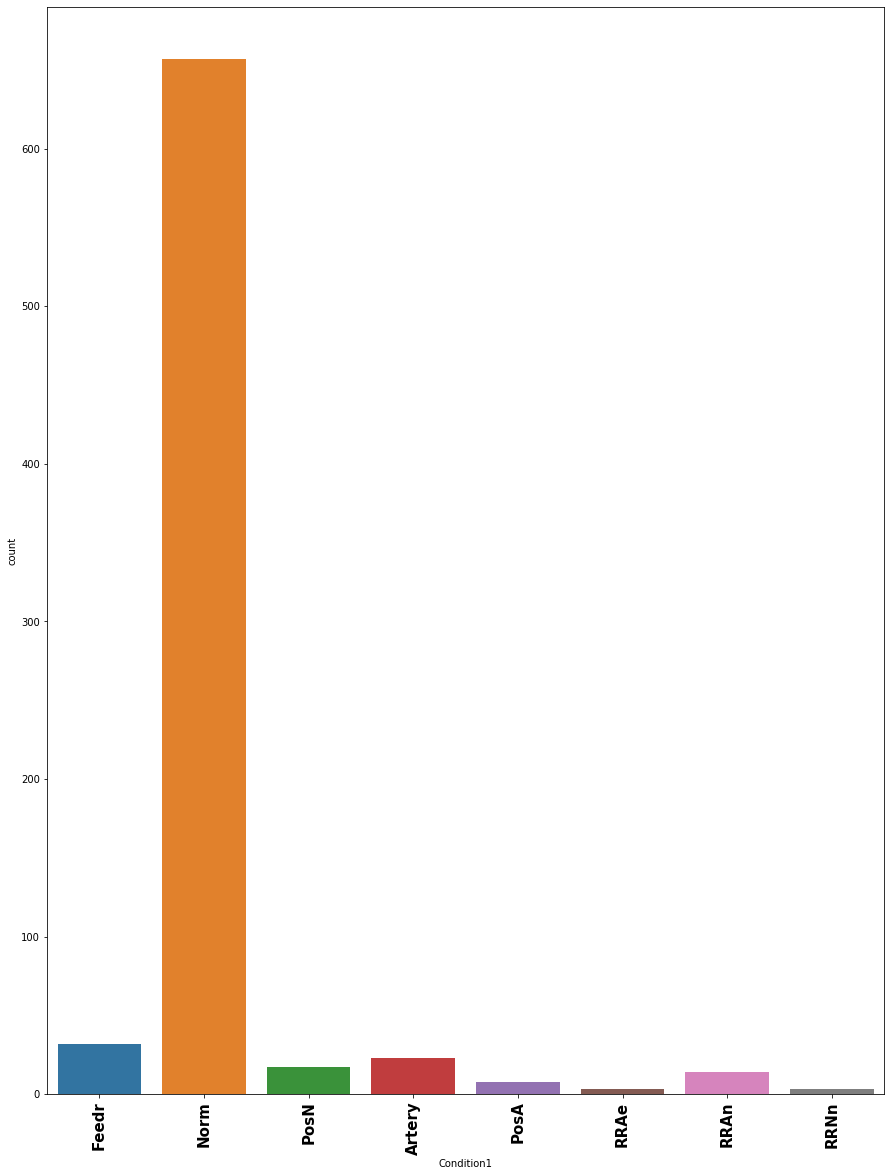

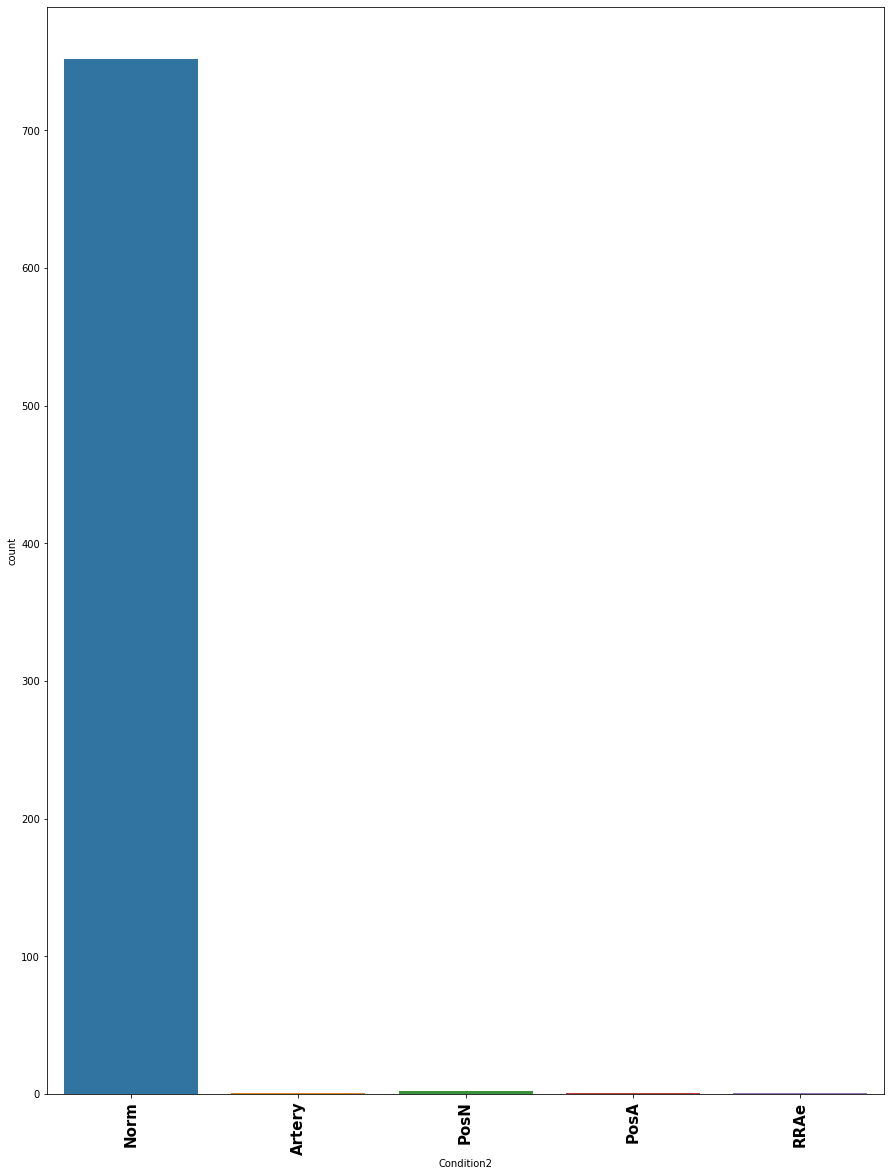

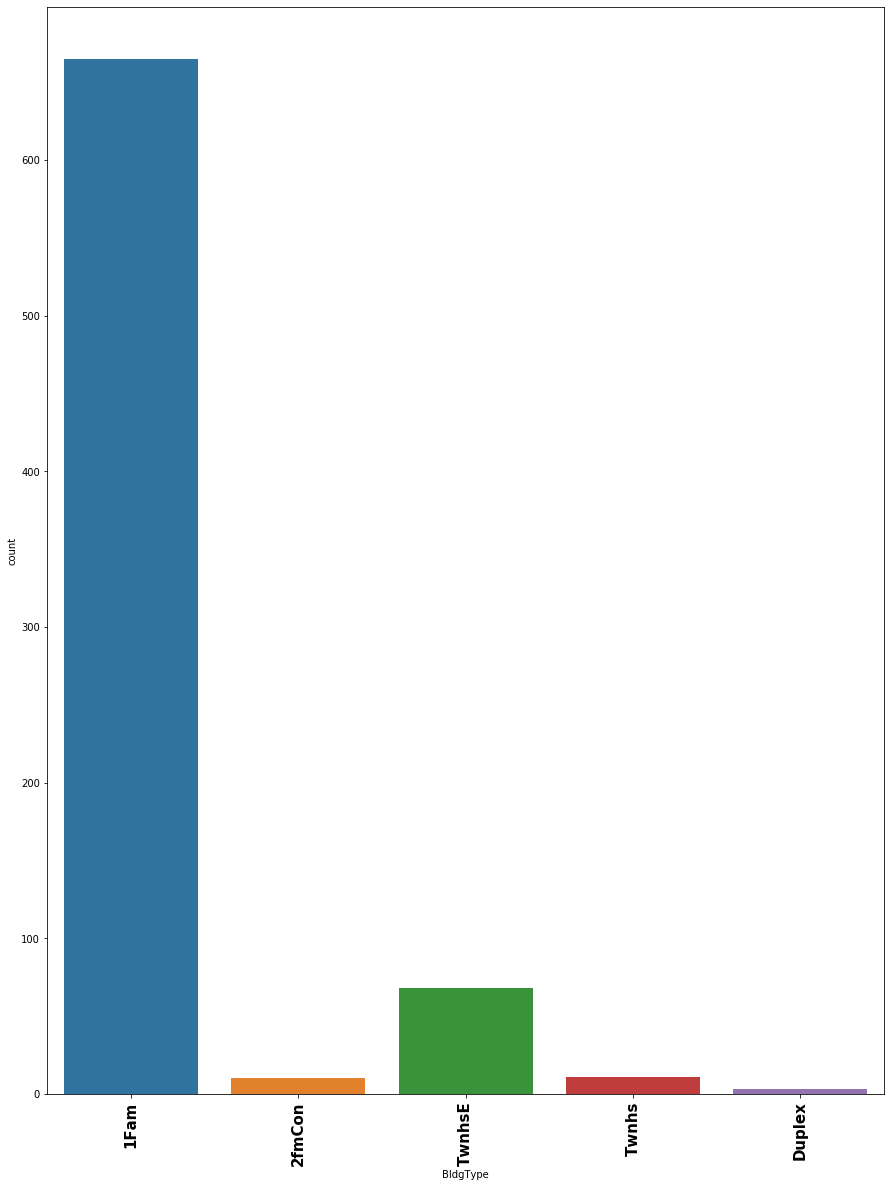

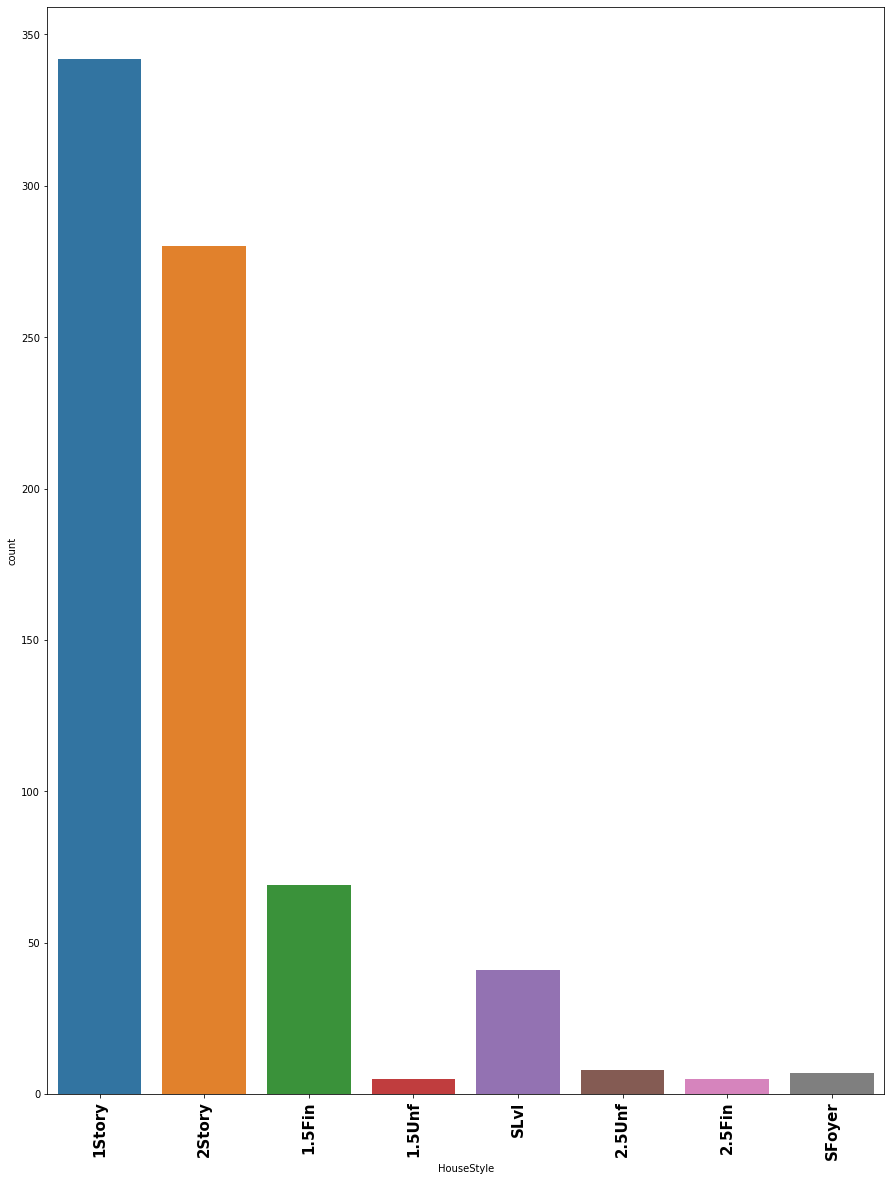

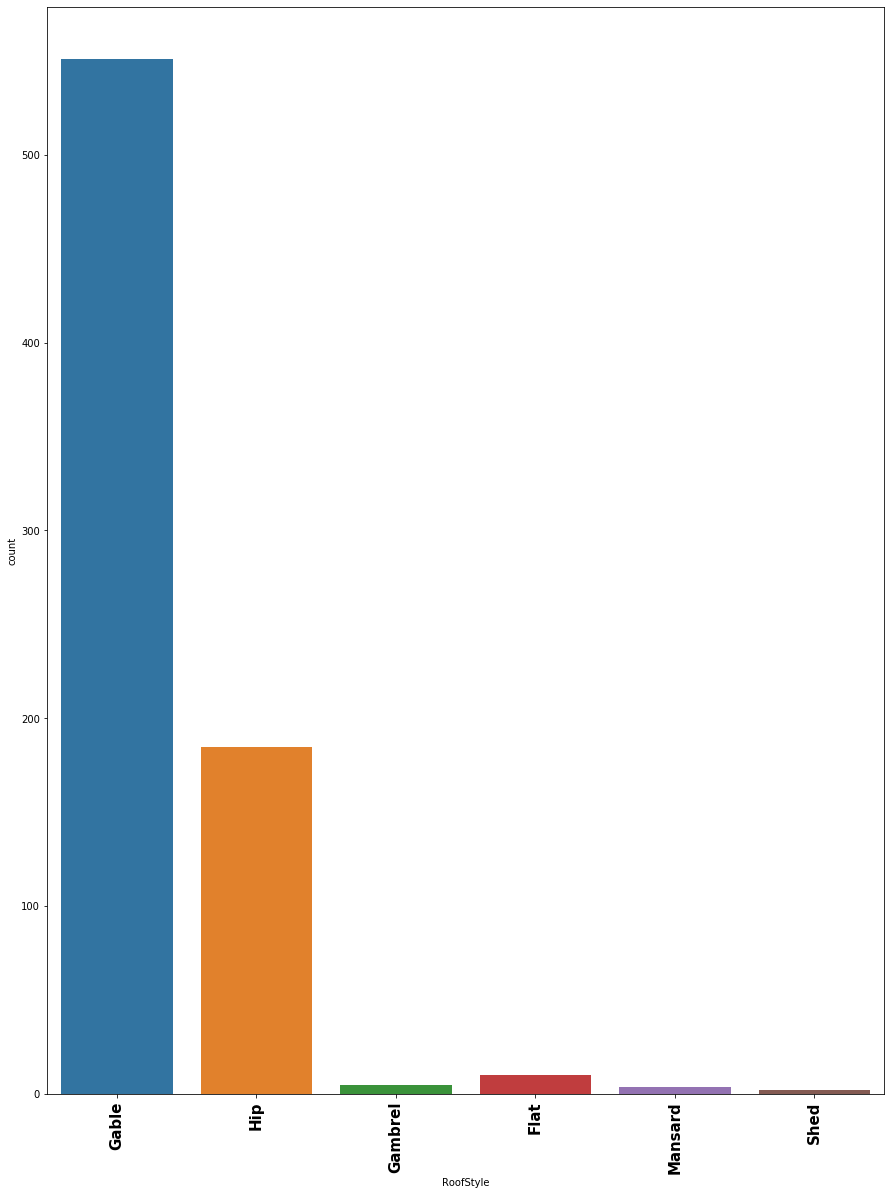

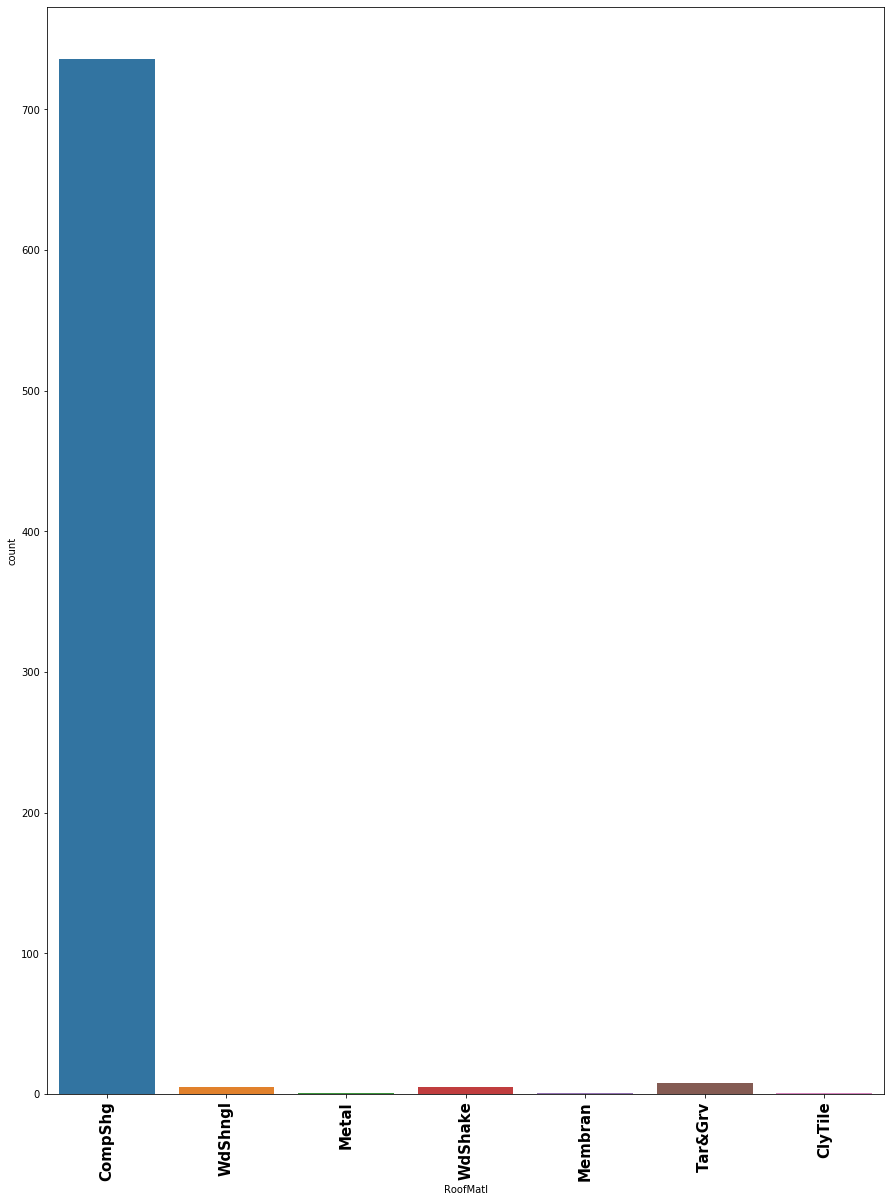

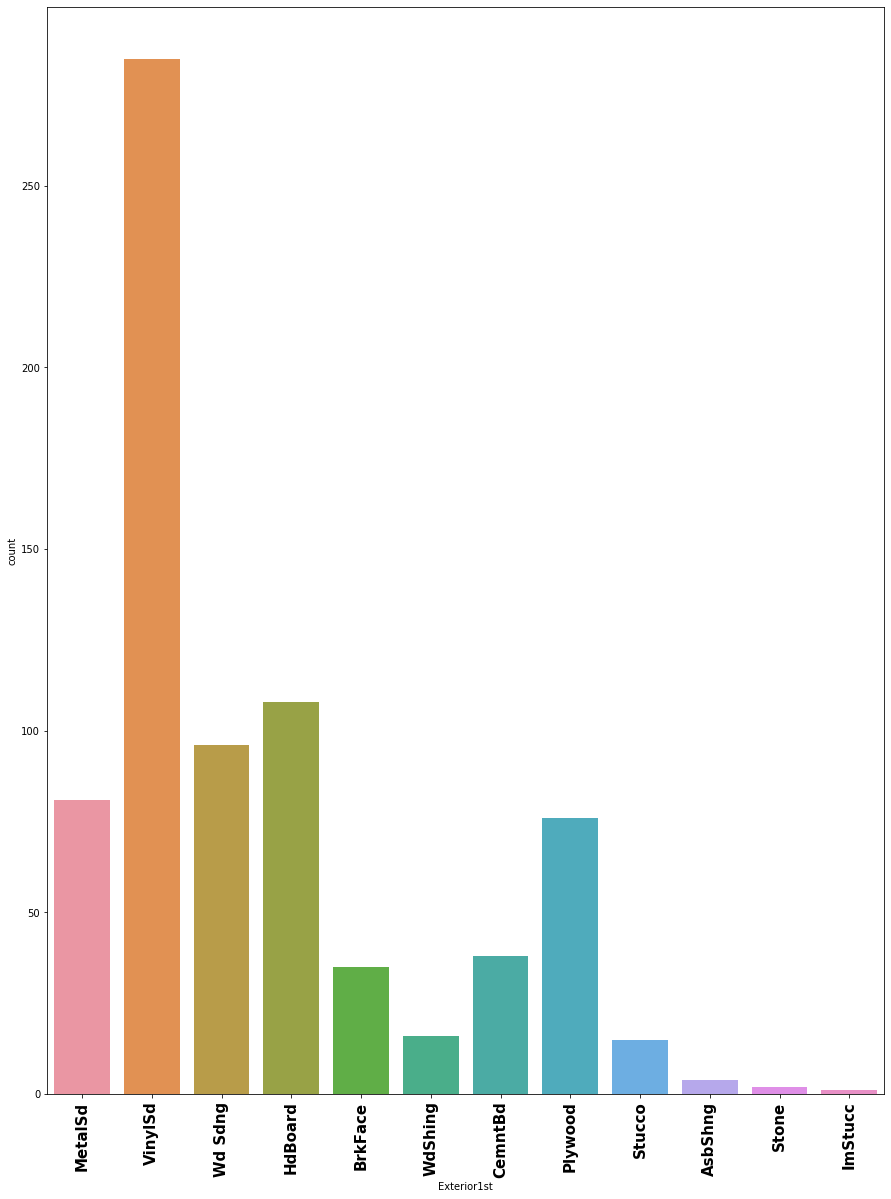

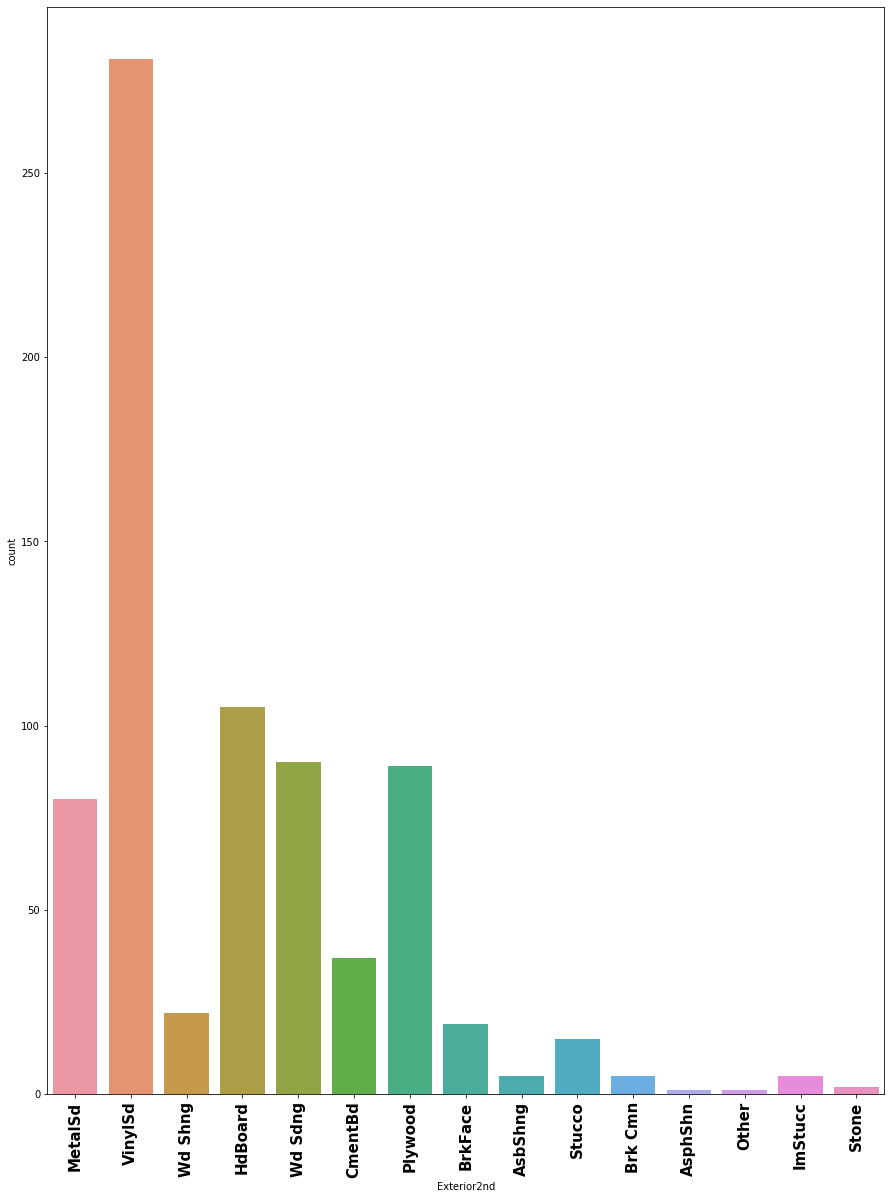

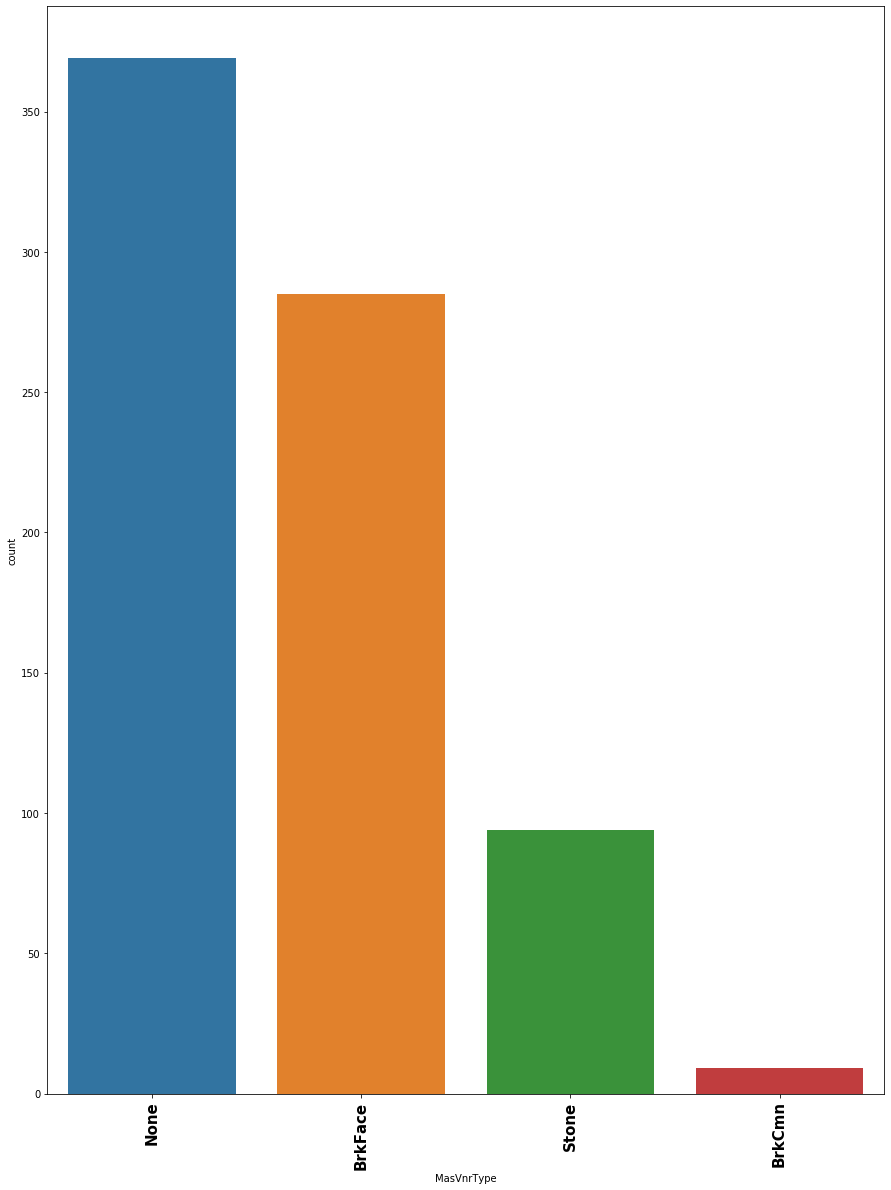

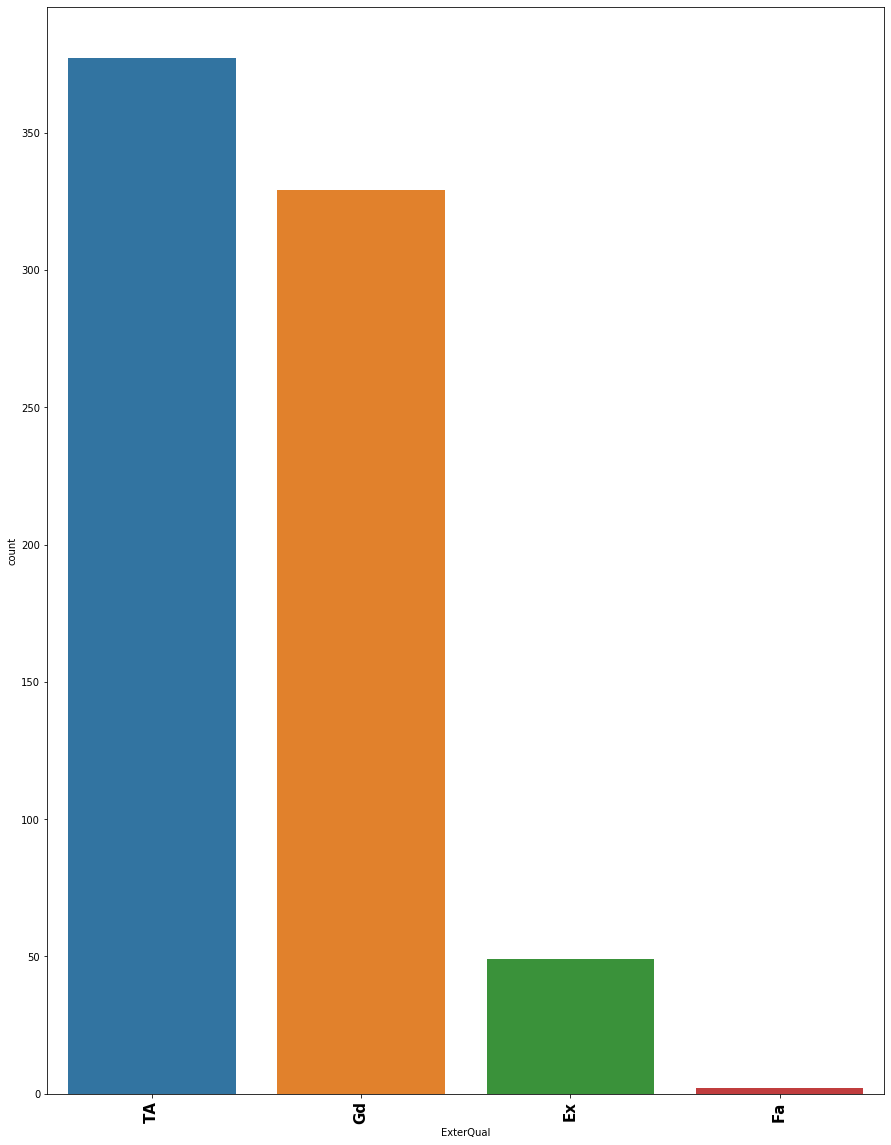

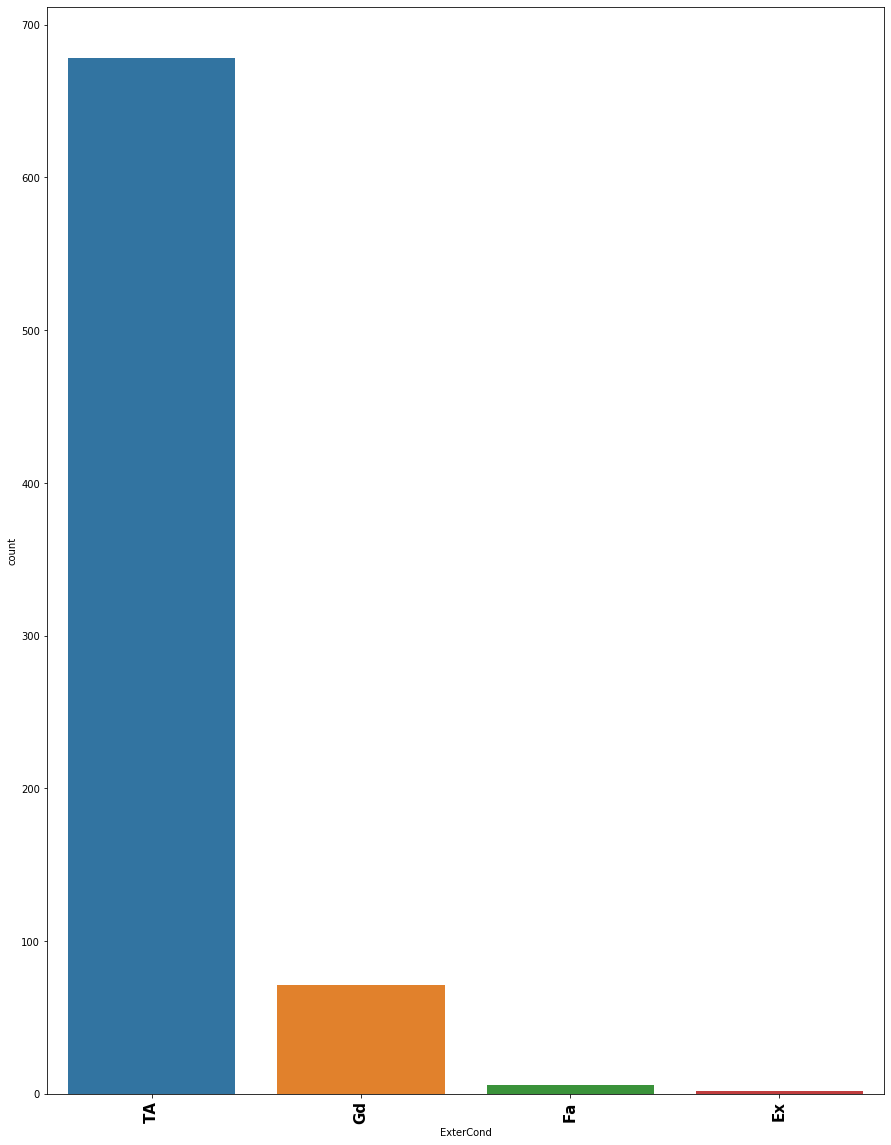

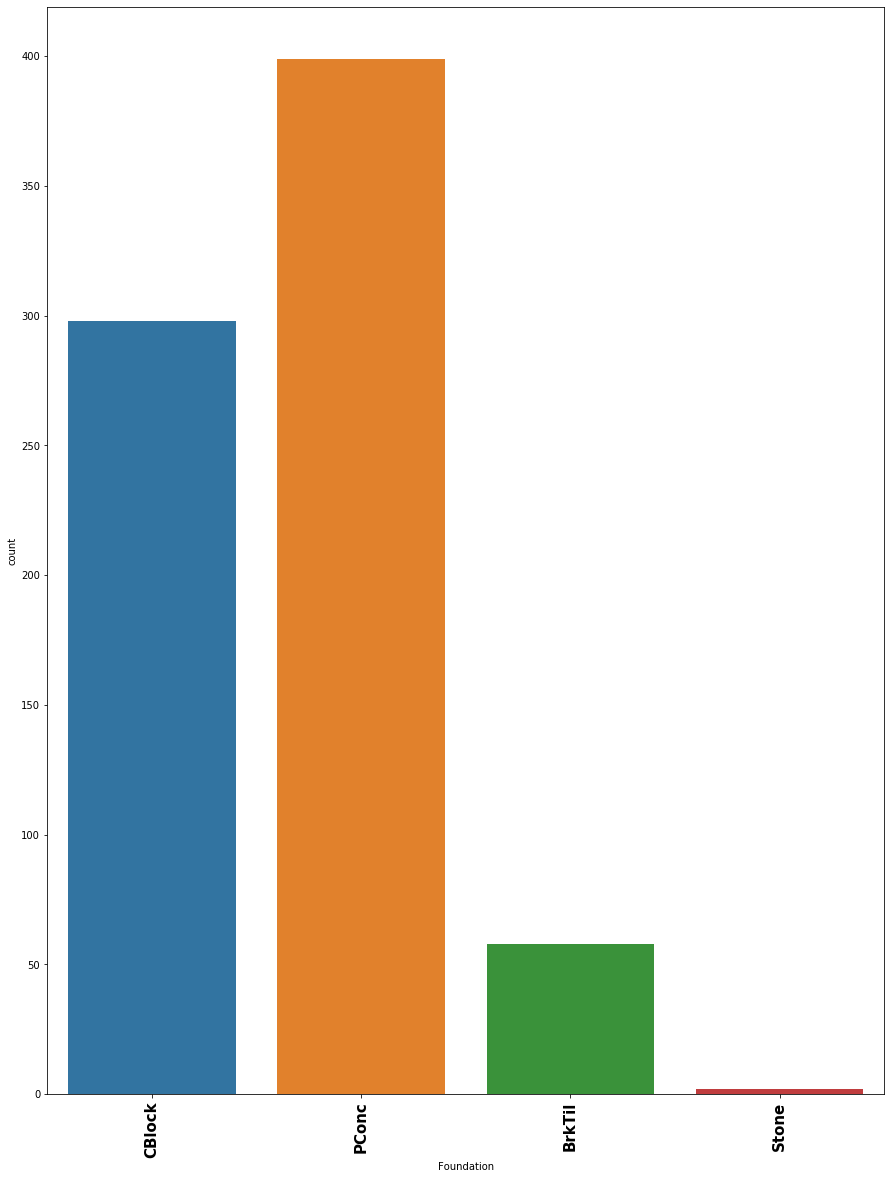

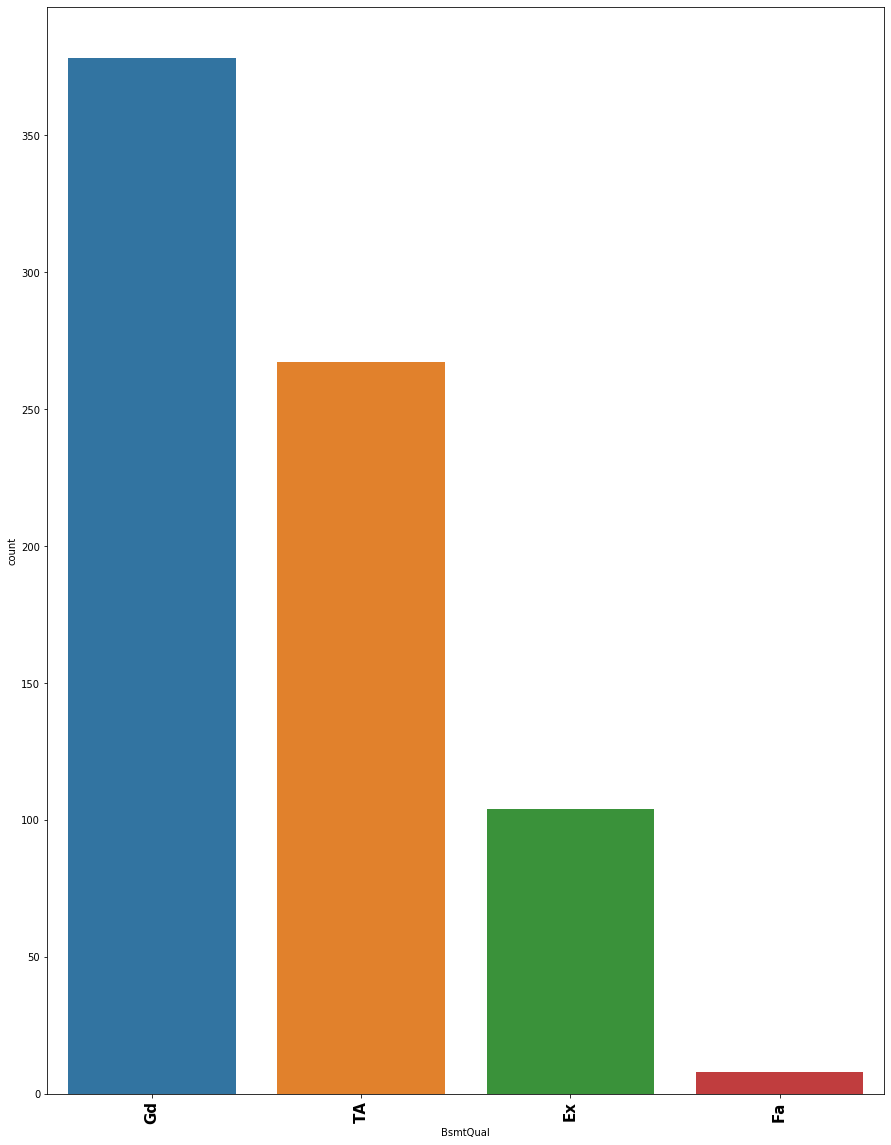

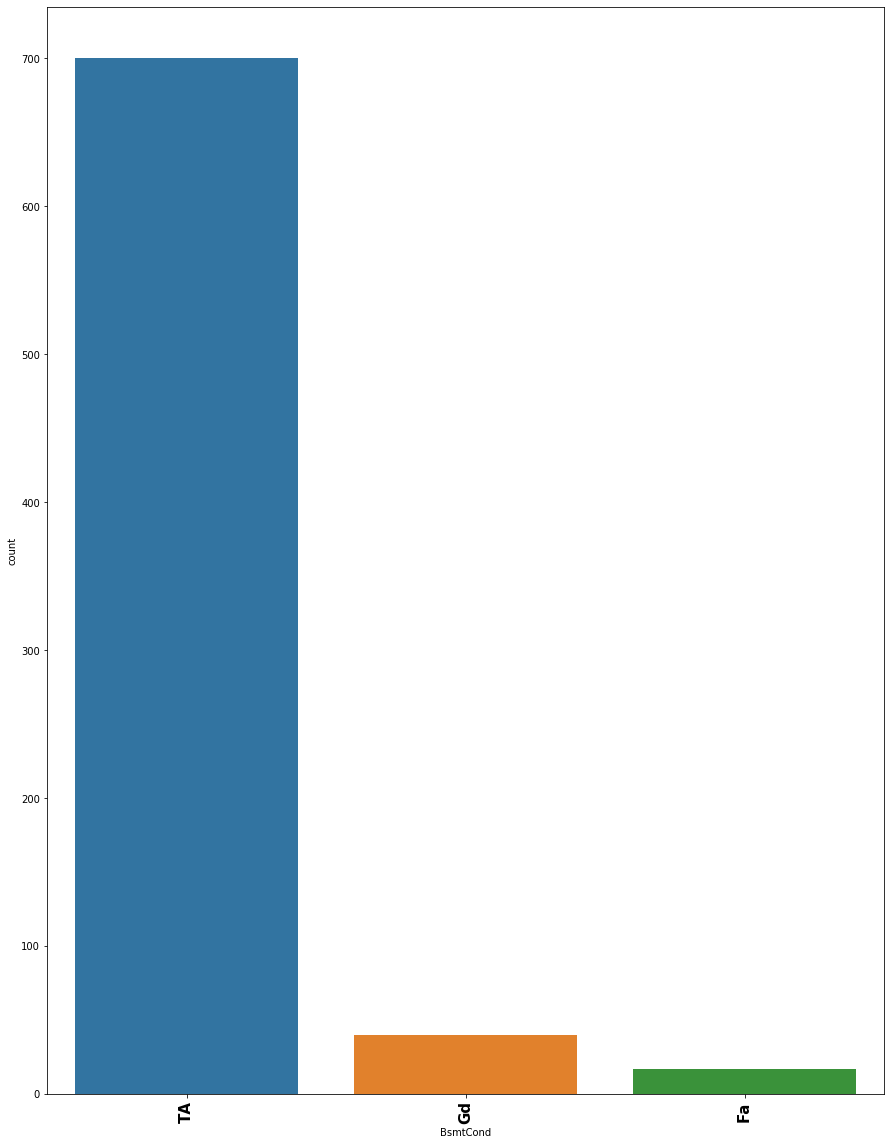

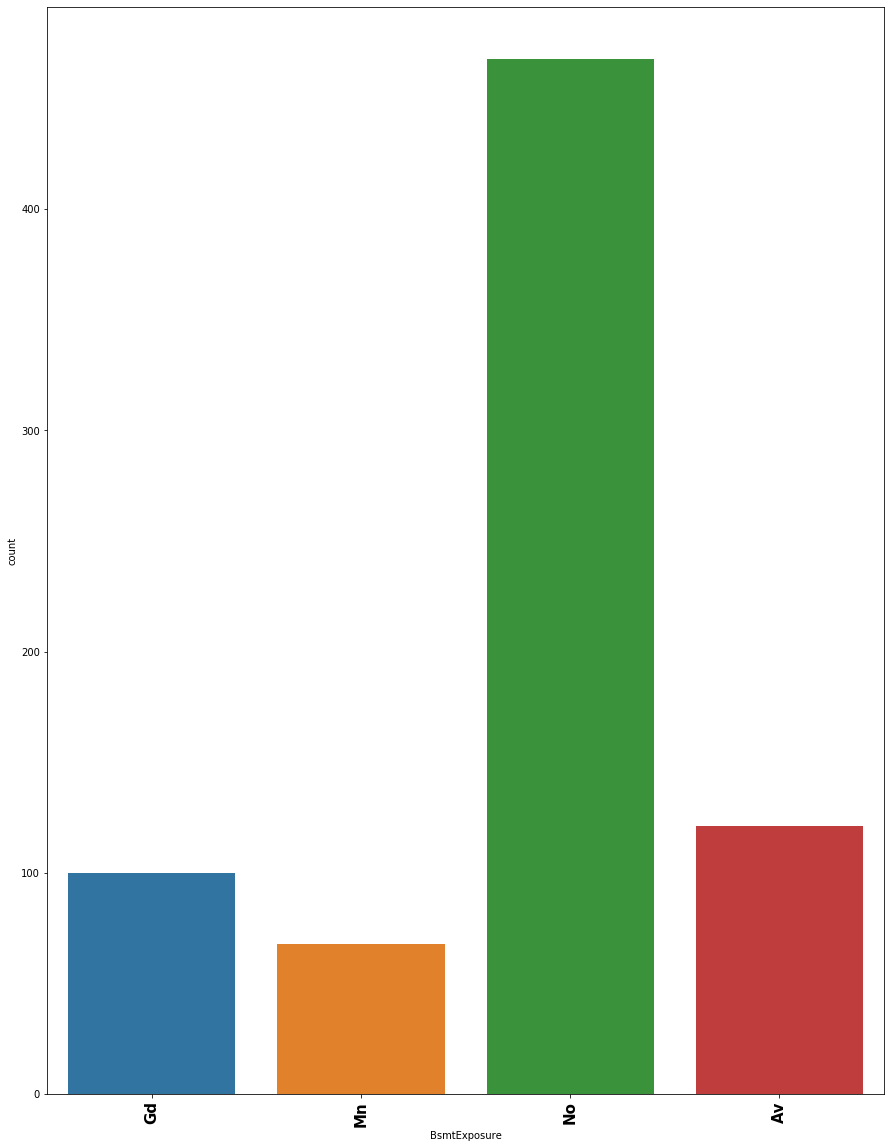

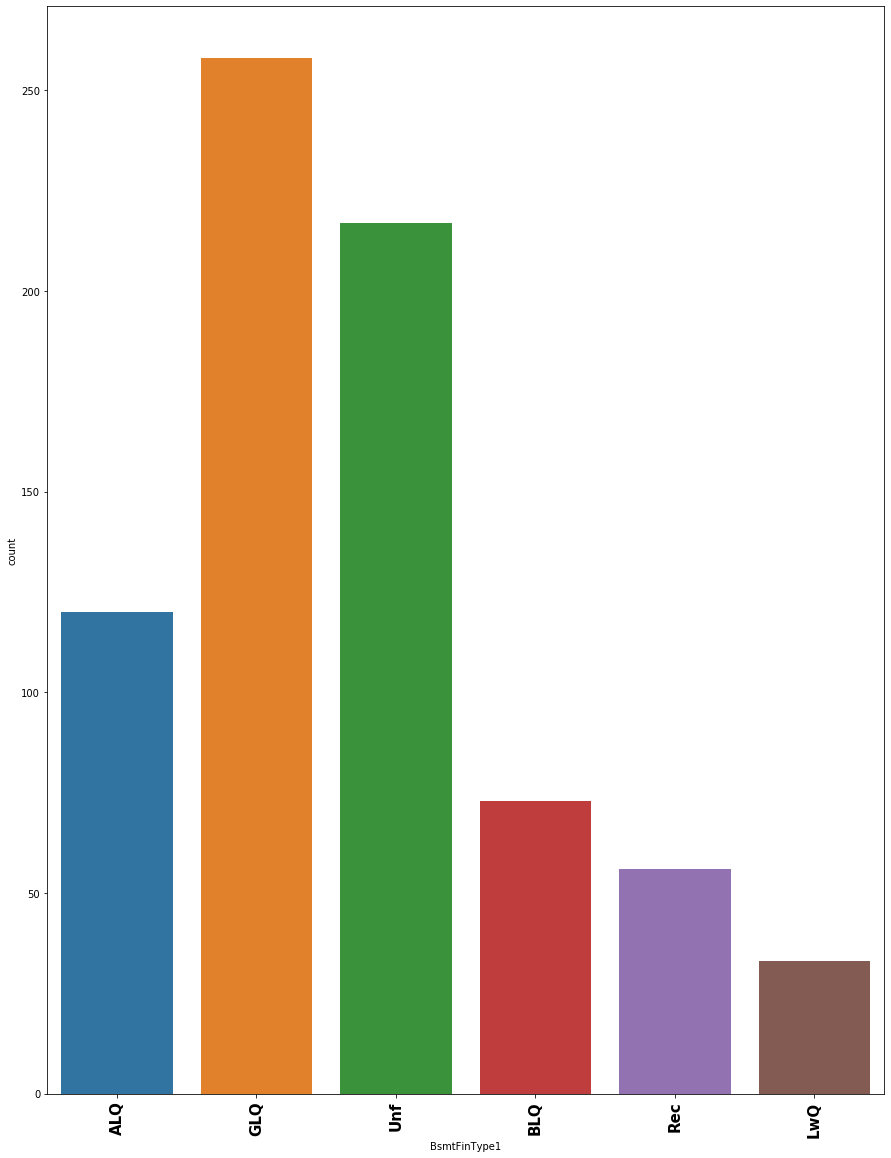

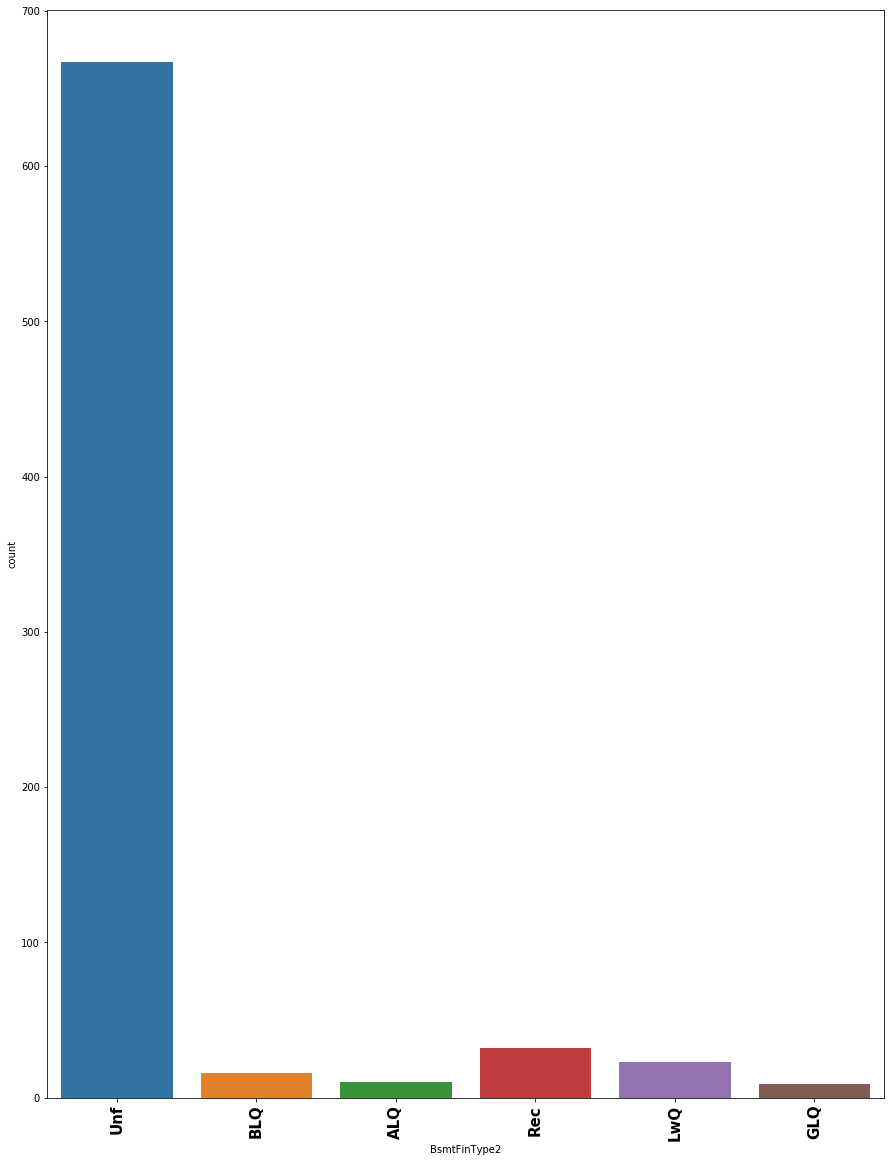

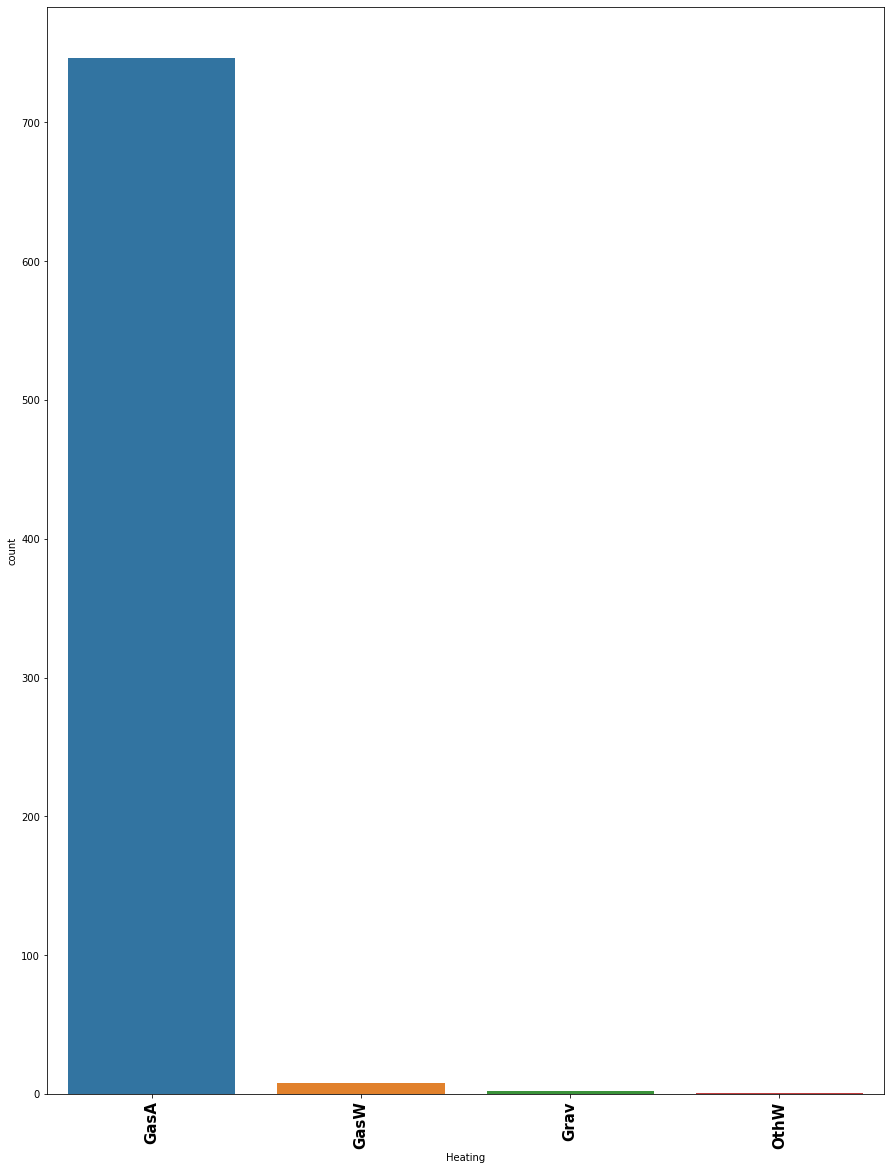

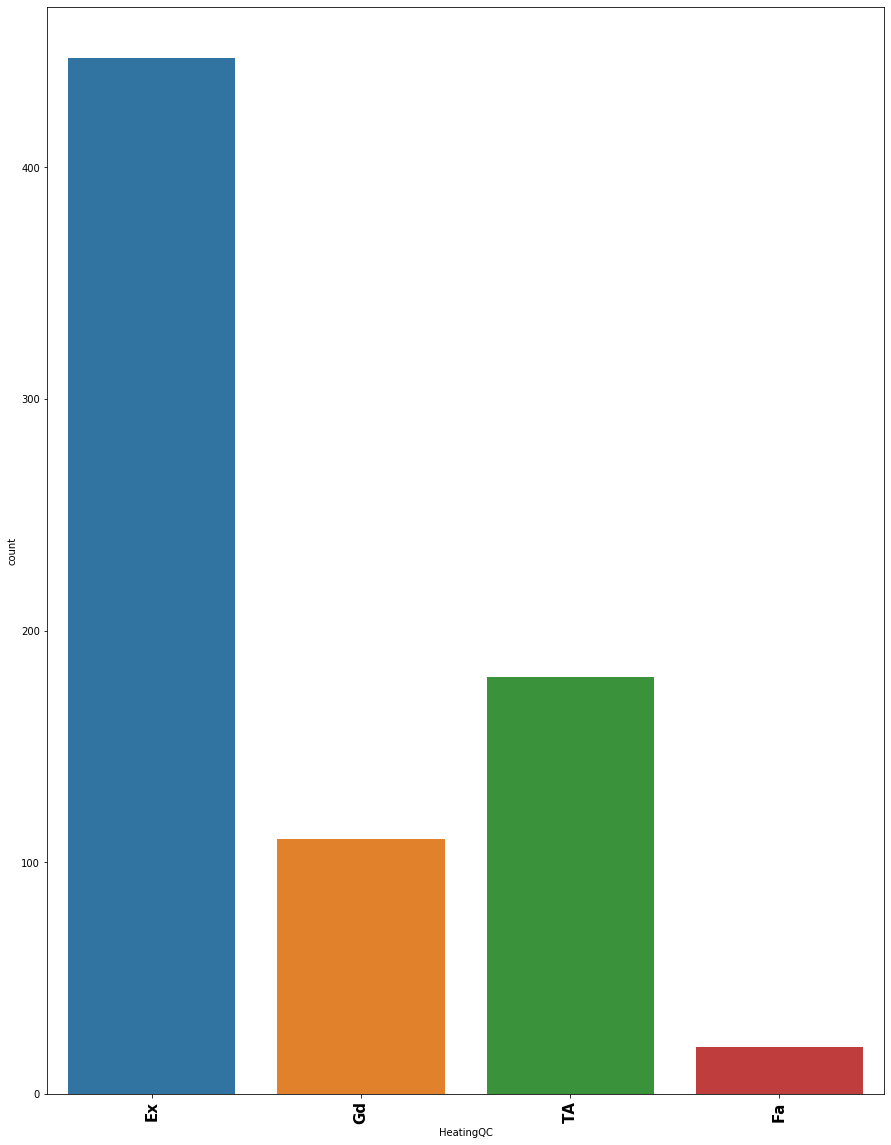

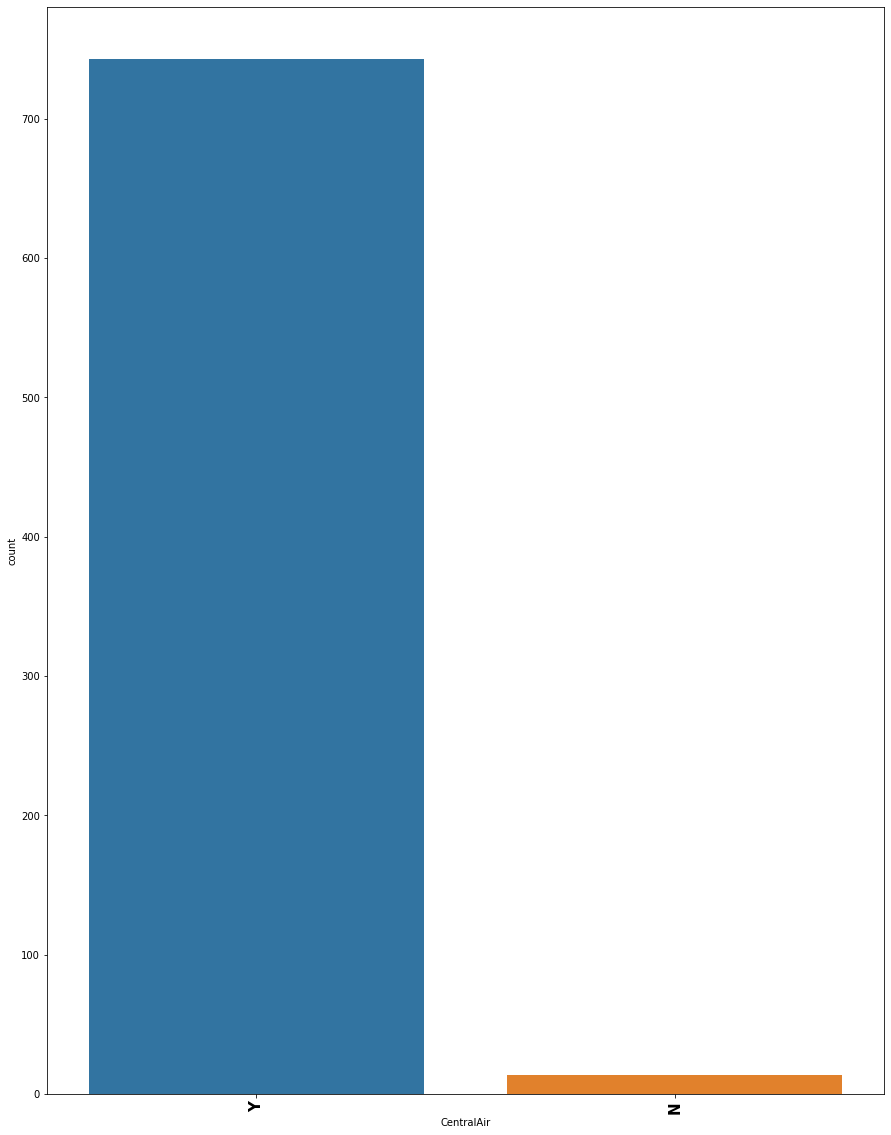

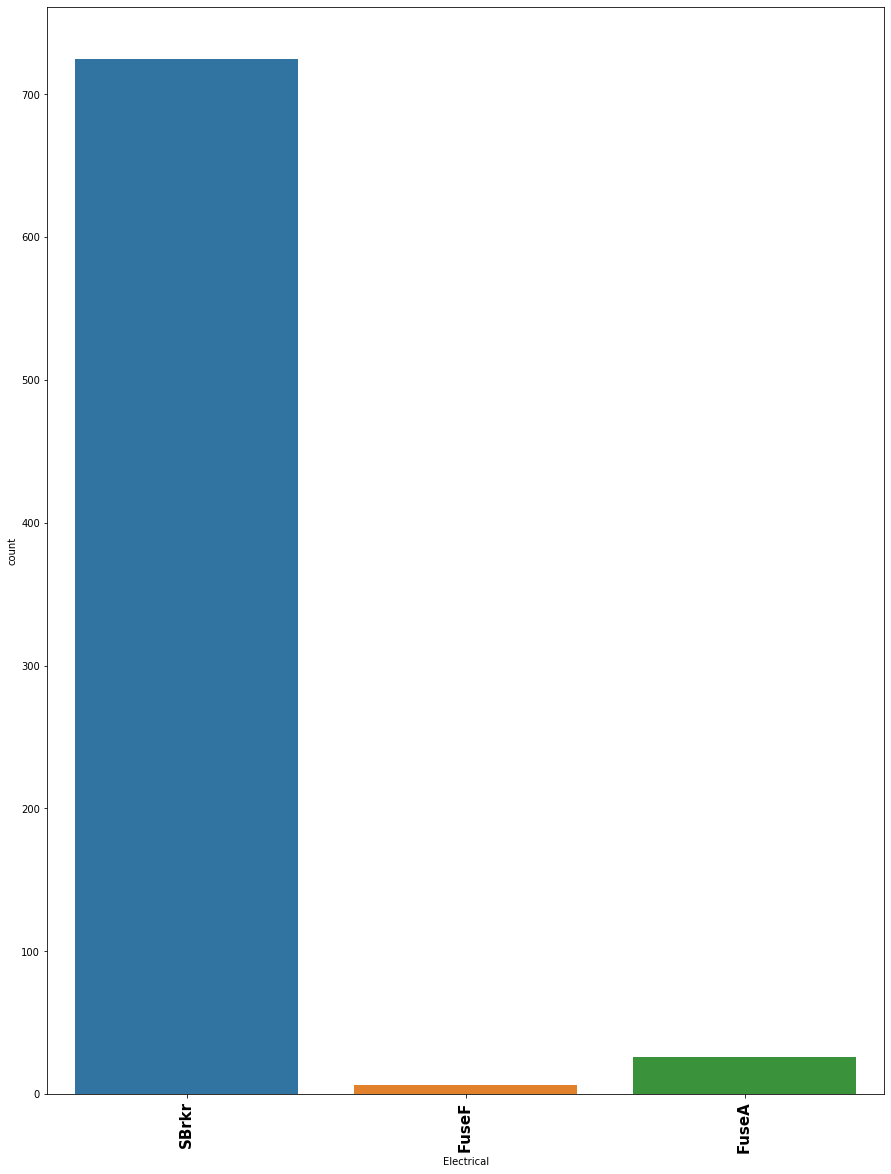

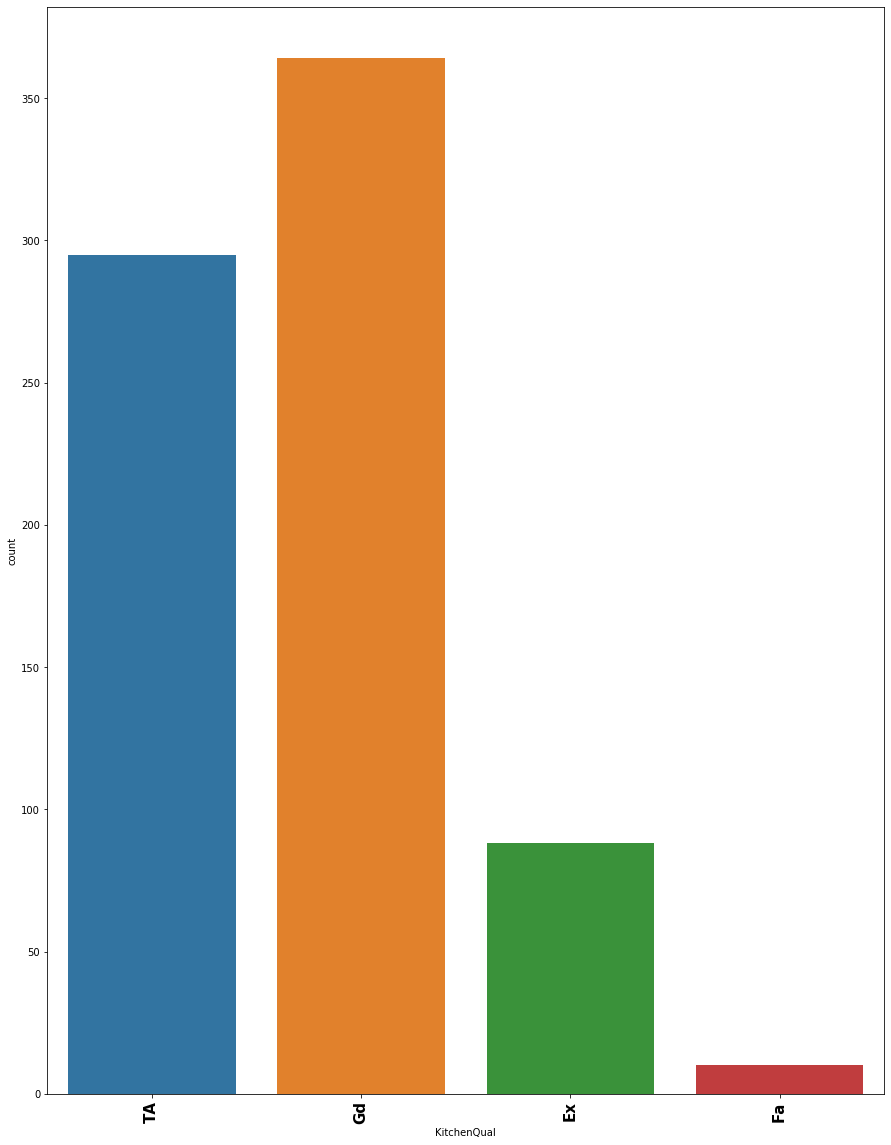

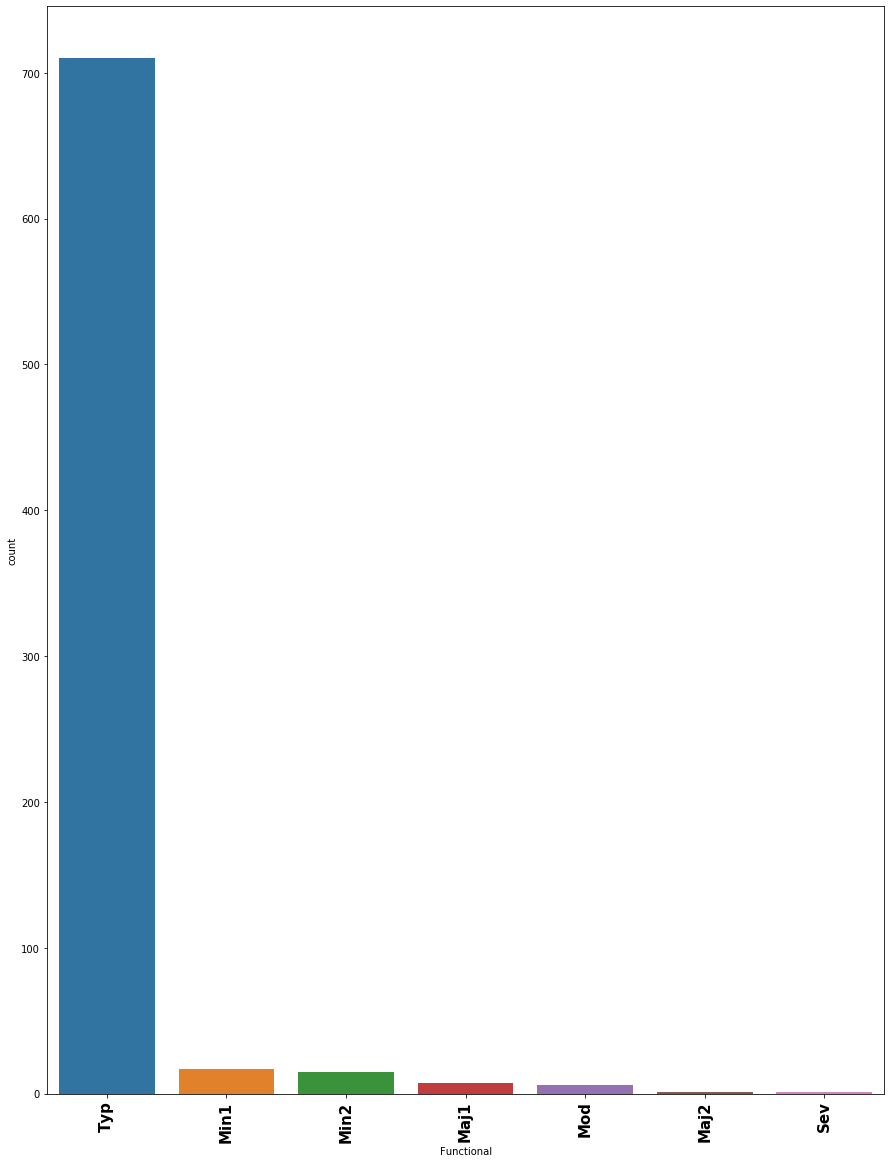

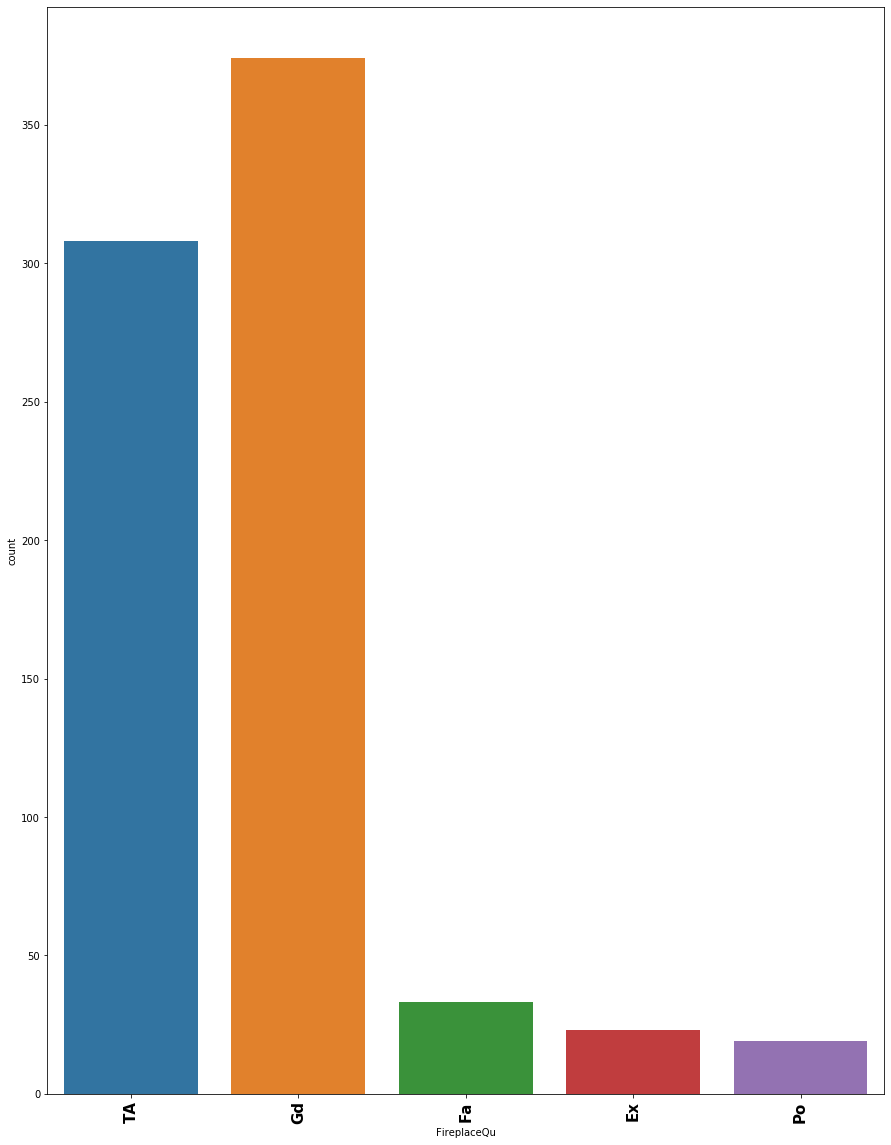

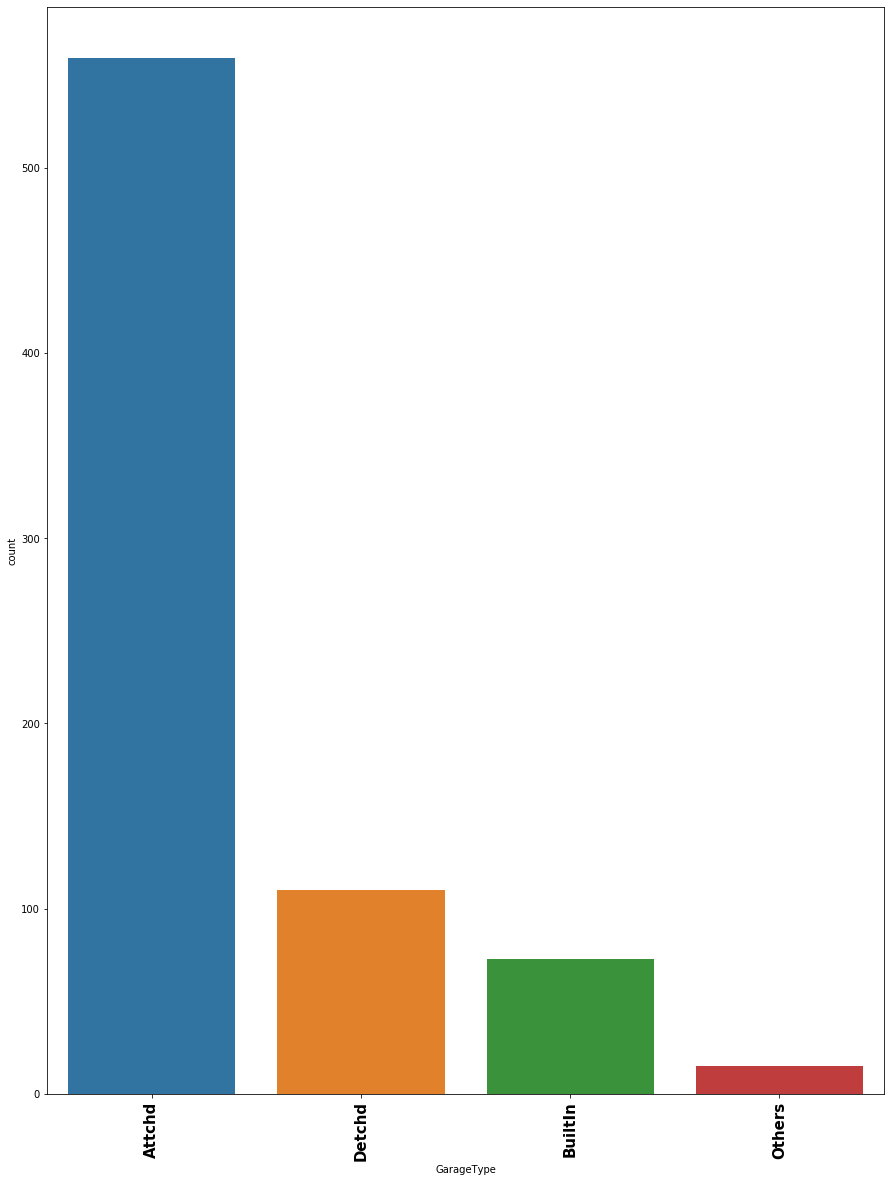

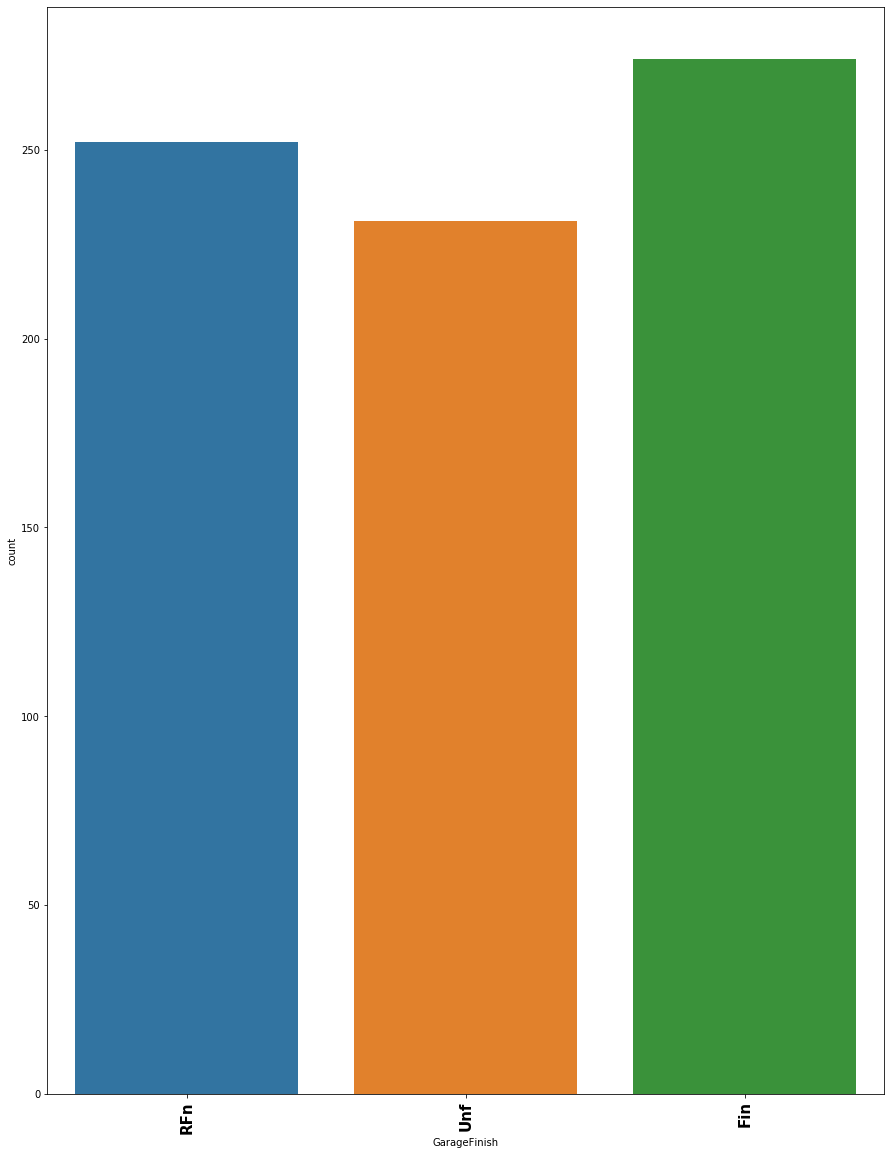

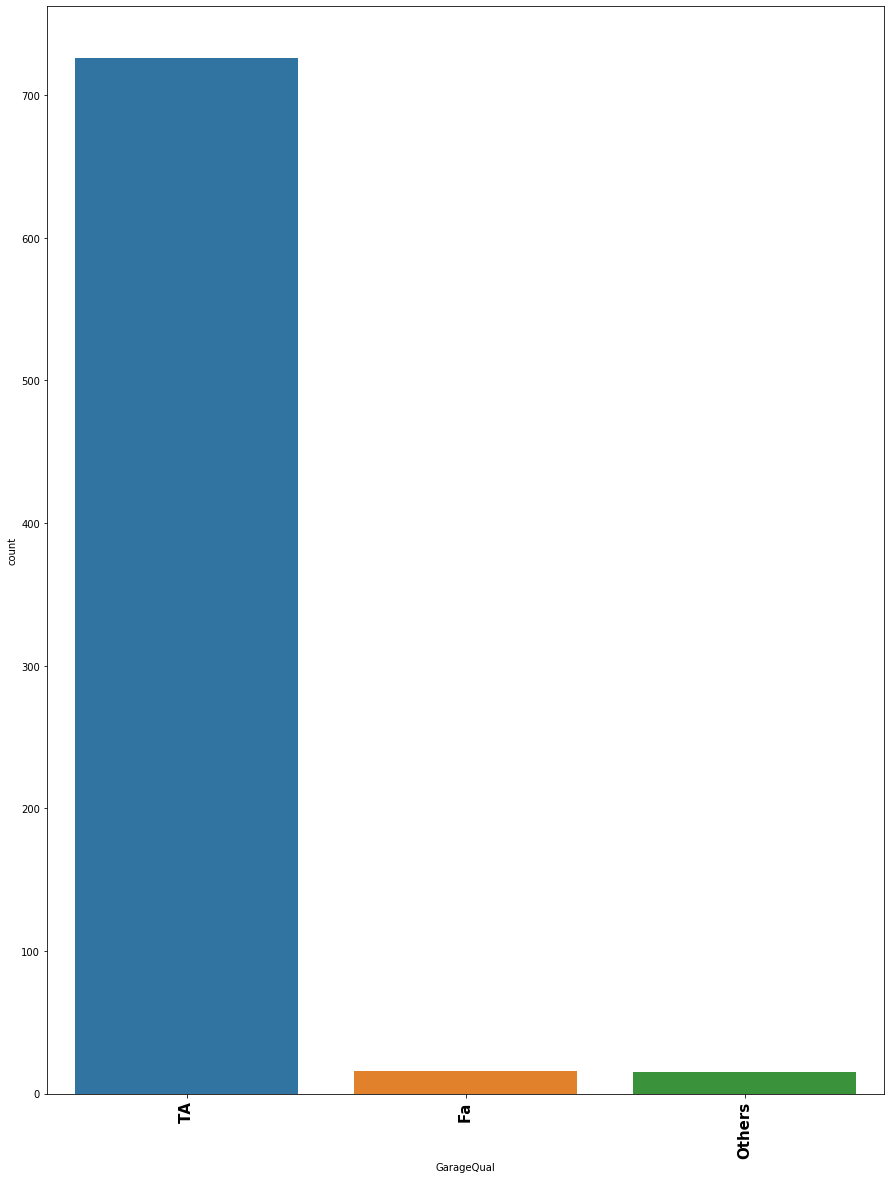

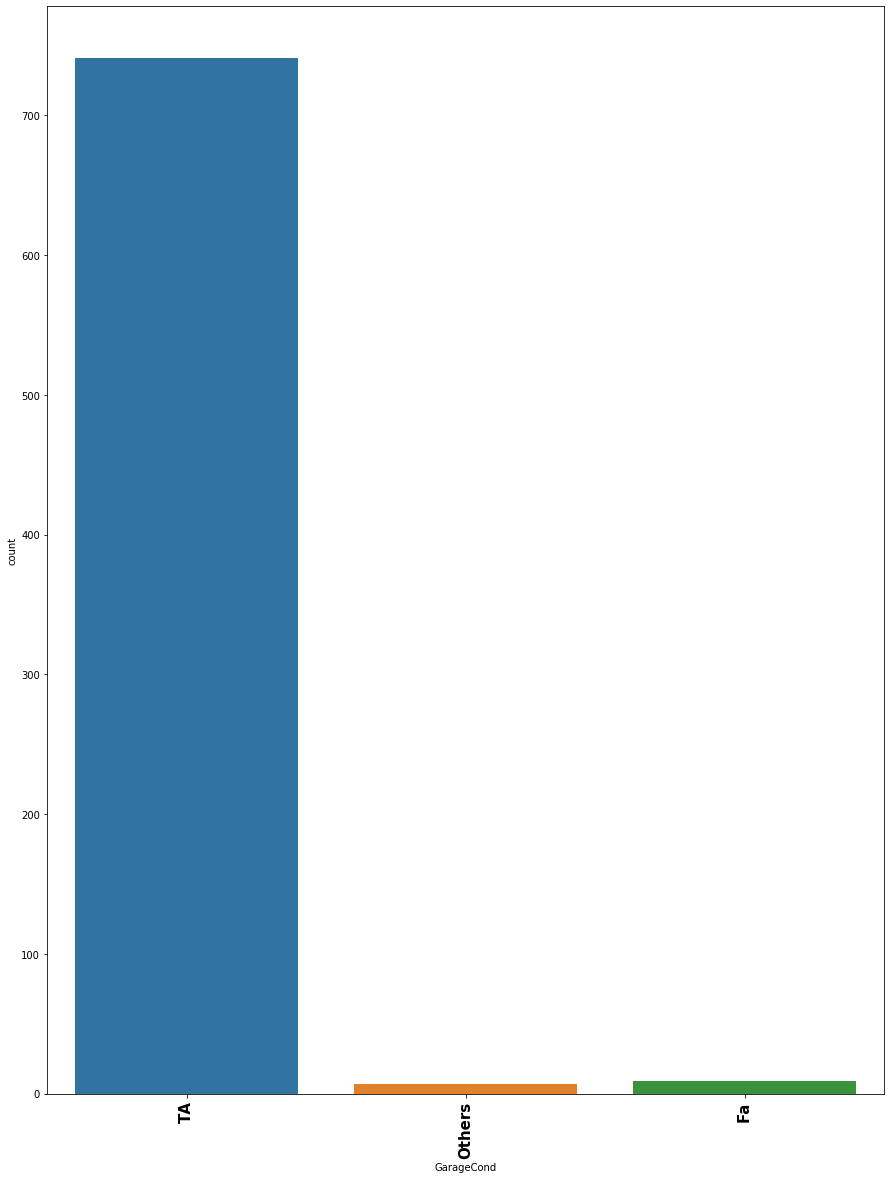

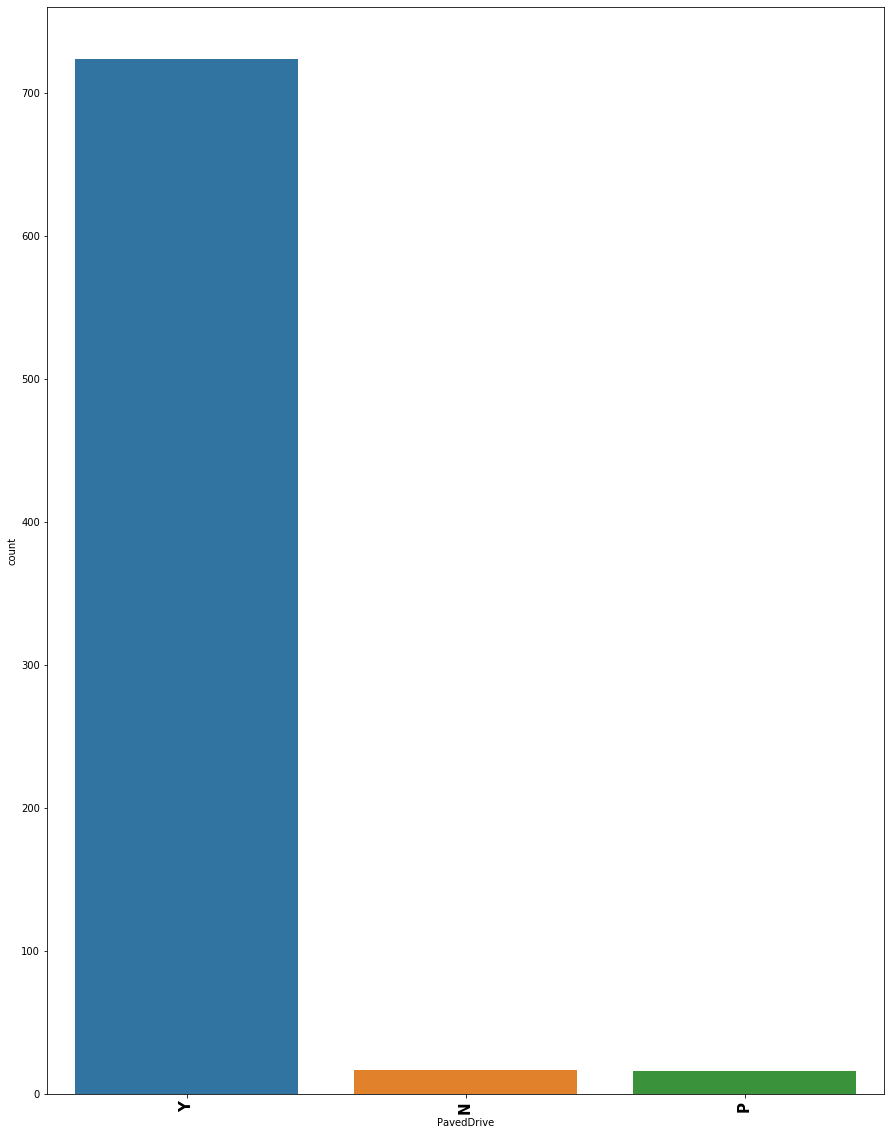

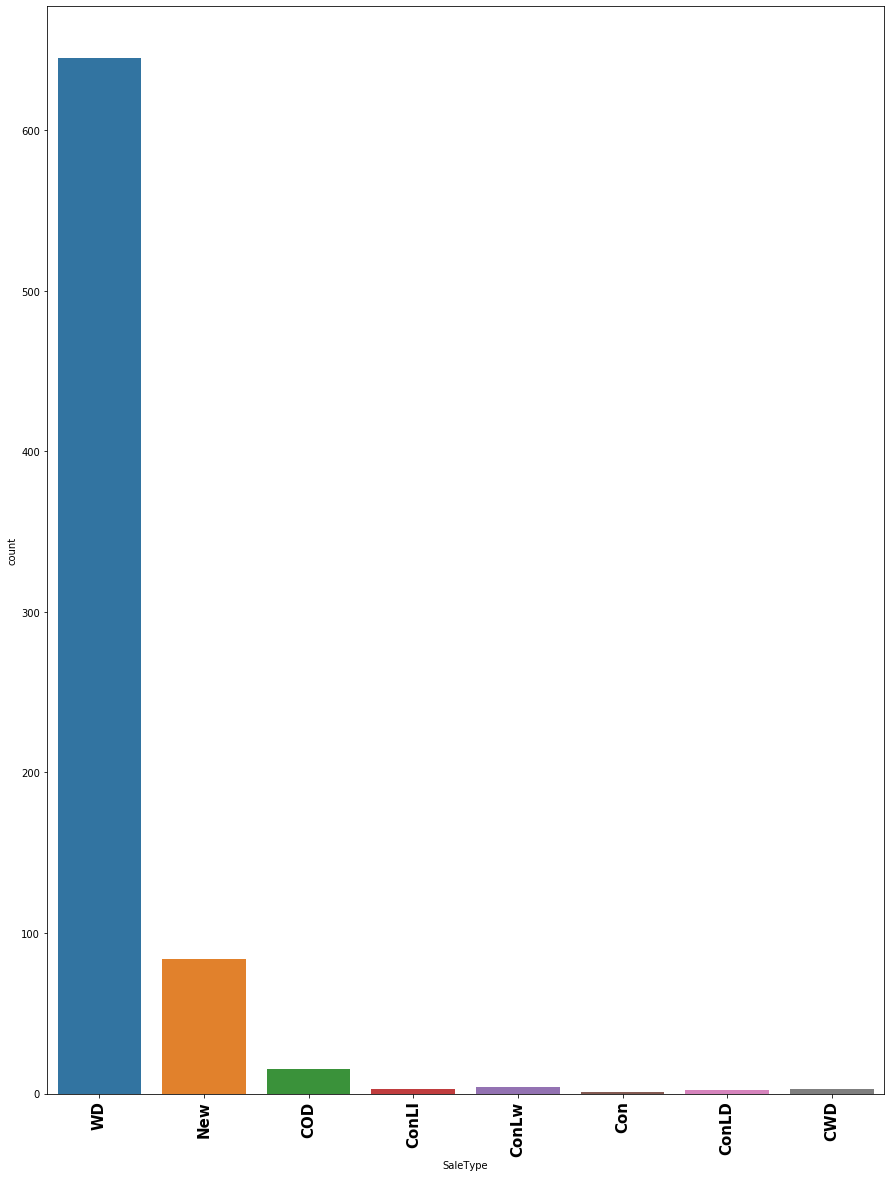

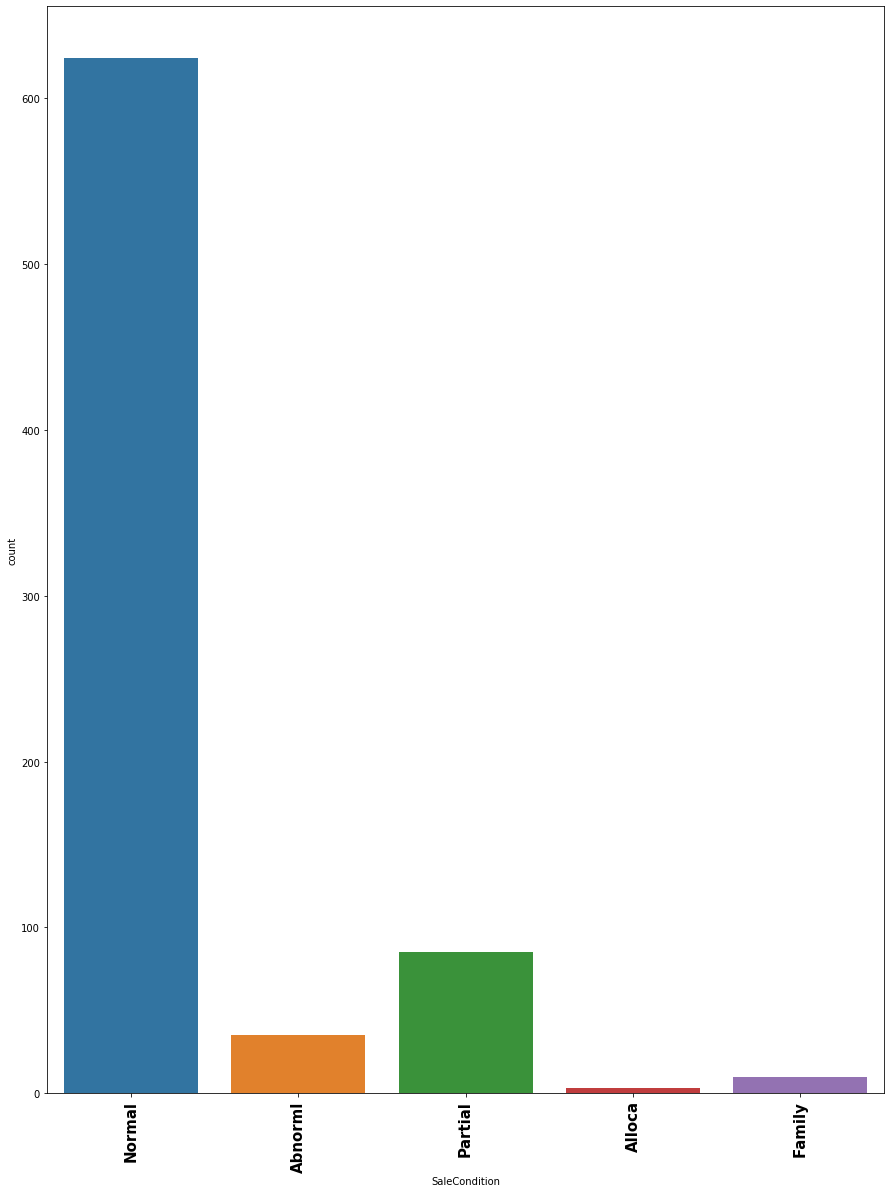

In [225]:
#Plooting countplot for categorical columns for EDA
for i in Frame_20.select_dtypes(include = object):
    plt.figure(figsize = (15,20))
    sns.countplot(i, data = Frame_20)
    plt.xticks(x =i ,fontweight = 'bold', rotation = 90, fontsize = 15 )
    plt.xlabel(i, fontsize = 10)
    plt.show()

In [226]:
#Columns Street has most values as Pave hence it explains low variance so dropping it.
Frame_20.drop('Street', axis = 1, inplace = True)

In [227]:
#Columns Utilities has most values as AllPub hence it explains low variance so dropping it.
#Columns GarageCond has most values as Pave hence it explains low variance so dropping it.
#Columns Conditions has most values as Norm hence it explains low variance so dropping it.



Frame_20.drop(['Utilities','Condition2','GarageCond'], axis = 1, inplace = True)

In [228]:
#Checking number of occurance of certain categories in columns RoofStyle
Frame_20['RoofStyle'].value_counts()

Gable      551
Hip        185
Flat        10
Gambrel      5
Mansard      4
Shed         2
Name: RoofStyle, dtype: int64

In [229]:
#Replacing least occuring values in Roofstyle by others
Frame_20['RoofStyle'].replace(['Gambrel','Mansard','Shed'],'Others', inplace = True)

In [230]:
#Checking number of occurance of certain categories in columns RoofMatl
Frame_20['RoofMatl'].value_counts()

CompShg    736
Tar&Grv      8
WdShake      5
WdShngl      5
Metal        1
ClyTile      1
Membran      1
Name: RoofMatl, dtype: int64

In [231]:
#Replacing least occuring values in RoofMatl by others
Frame_20['RoofMatl'].replace(['WdShake','WdShngl','Metal','ClyTile','Membran'], 'Others', inplace = True)

In [232]:
#Checking number of occurance of certain categories in columns ExterCond
Frame_20['ExterCond'].value_counts()

TA    678
Gd     71
Fa      6
Ex      2
Name: ExterCond, dtype: int64

In [233]:
#Replacing least occuring values in ExterCond by others
Frame_20['ExterCond'].replace(['Fa','Ex'], 'Others', inplace = True)

In [234]:
#Checking number of occurance of certain categories in column Heating
Frame_20['Heating'].value_counts()

GasA    746
GasW      8
Grav      2
OthW      1
Name: Heating, dtype: int64

In [235]:
#Replacing least occuring values in Heating by others 
Frame_20['Heating'].replace(['GasW','Grav','OthW'], 'Others', inplace = True)

In [236]:
#Checking number of occurance of certain categories in column Functional
Frame_20['Functional'].value_counts()

Typ     710
Min1     17
Min2     15
Maj1      7
Mod       6
Sev       1
Maj2      1
Name: Functional, dtype: int64

In [237]:
#Replacing least occuring values in Functional by others
Frame_20['Functional'].replace(['Mod','Maj1','Sev','Maj2'], 'Others', inplace = True)

In [238]:
#Binary mapping being done for column CentralAir
Frame_20['CentralAir'] = Frame_20['CentralAir'].map({'Y':1,'N': 0})


In [239]:
#Changing datatype of column to object so that columns cab be treated as categorical
Frame_20[['YearBuilt_age','YearRemodAdd_age','GarageYrBlt_age','YrSold_age']] = Frame_20[['YearBuilt_age','YearRemodAdd_age','GarageYrBlt_age','YrSold_age']].astype('object')

In [240]:
var45 = Frame_20.select_dtypes(include = object)
var45.columns              

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition',
       'YearBuilt_age', 'YearRemodAdd_age', 'GarageYrBlt_age', 'YrSold_age'],
      dtype='object')

In [241]:
#Checking summary of numerical columns
Frame_20.select_dtypes(exclude = object).describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  757.000000   757.000000     757.000000   757.000000   757.000000   
mean    55.766182    74.309115   12227.406869     6.689564     5.525760   
std     36.929176    24.315379   13149.144319     1.287941     1.008396   
min     20.000000    21.000000    1300.000000     2.000000     2.000000   
25%     20.000000    63.000000    8461.000000     6.000000     5.000000   
50%     60.000000    69.000000   10496.000000     7.000000     5.000000   
75%     60.000000    83.000000   12822.000000     8.000000     6.000000   
max    190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count   757.000000   757.000000   757.000000   757.000000   757.000000   
mean    148.733157   526.944518    51.500661   619.749009  1198.194188   
std     217.395387   520.319171   177.192588   458.148266   454.101946   
min       0.000000     0.000000     0.000000     0.000000   264.000000   
25%       0.000000     0.000000     0.000000   280.000000   868.000000   
50%      22.000000   457.000000     0.000000   512.000000  1127.000000   
75%     246.000000   865.000000     0.000000   879.000000  1461.000000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

       CentralAir     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  757.000000   757.000000   757.000000    757.000000   757.000000   
mean     0.981506  1297.442536   434.322325      4.274769  1736.039630   
std      0.134819   411.584293   479.535083     42.434900   537.800897   
min      0.000000   483.000000     0.000000      0.000000   694.000000   
25%      1.000000   992.000000     0.000000      0.000000  1392.000000   
50%      1.000000  1251.000000     0.000000      0.000000  1657.000000   
75%      1.000000  1554.000000   833.000000      0.000000  1980.000000   
max      1.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  \
count    757.000000     757.00000  757.000000  757.000000    757.000000   
mean       0.467635       0.06605    1.713342    0.494055      2.943197   
std        0.522581       0.25380    0.530542    0.518473      0.766837   
min        0.000000       0.00000    0.000000    0.000000      0.000000   
25%        0.000000       0.00000    1.000000    0.000000      3.000000   
50%        0.000000       0.00000    2.000000    0.000000      3.000000   
75%        1.000000       0.00000    2.000000    1.000000      3.000000   
max        2.000000       2.00000    3.000000    2.000000      5.000000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars   GarageArea  \
count    757.000000    757.000000  757.000000  757.000000   757.000000   
mean       1.011889      7.019815    1.161162    2.018494   535.198151   
std        0.108458      1.599728    0.385481    0.652368   200.532421   
min        1.000000      3.000000    1.000000    0.000000     0.000000   
25%        1.000000      6.000000    1.000000    2.000000   420.000000   
50%        1.000000      7.000000    1.000000    2.000000   505.000000   
75%        1.000000      8.000000    1.000000    2.000000   648.000000   
max        2.000000     12.000000    3.000000    4.000000  1418.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  757.000000   757.000000     757.000000  757.000000   757.000000   
mean   121.608983    57.565390      19.351387    4.031704    23.383091   
std    136.665342    70.452299      61.618198   30.206241    68.694274   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%    100.000000    40.000000       0.000000    0.000000     0.000000   
75%    192.000000    82.000000       0.000000    0.000000     0.000000   
max    857.000000   547.000000     552.000000  407.000000   48

In [242]:
#Following inference could be drawn from above cell

#Columns LowQualFinSF has most of the values = o it explains low variance so it could be dropped.
#Columns BsmtFullBath has most of the values = o it explains low variance so it could be dropped
#Columns KitchenAbvGr has most of the values = 1 it explains low variance so it could be dropped
#Columns Fireplaces has most of the values = 1 it explains low variance so it could be dropped.
#Columns 3SsnPorch has most of the values = 0 it explains low variance so it could be dropped.
#Columns PoolArea has most of the values = 0 it explains low variance so it could be dropped.
#Columns MiscVal has most of the values = 0 it explains low variance so it could be dropped.





Frame_20.drop(['LowQualFinSF','BsmtFullBath','KitchenAbvGr','Fireplaces','3SsnPorch','PoolArea','MiscVal'],axis = 1, inplace = True)

<Figure size 720x576 with 0 Axes>

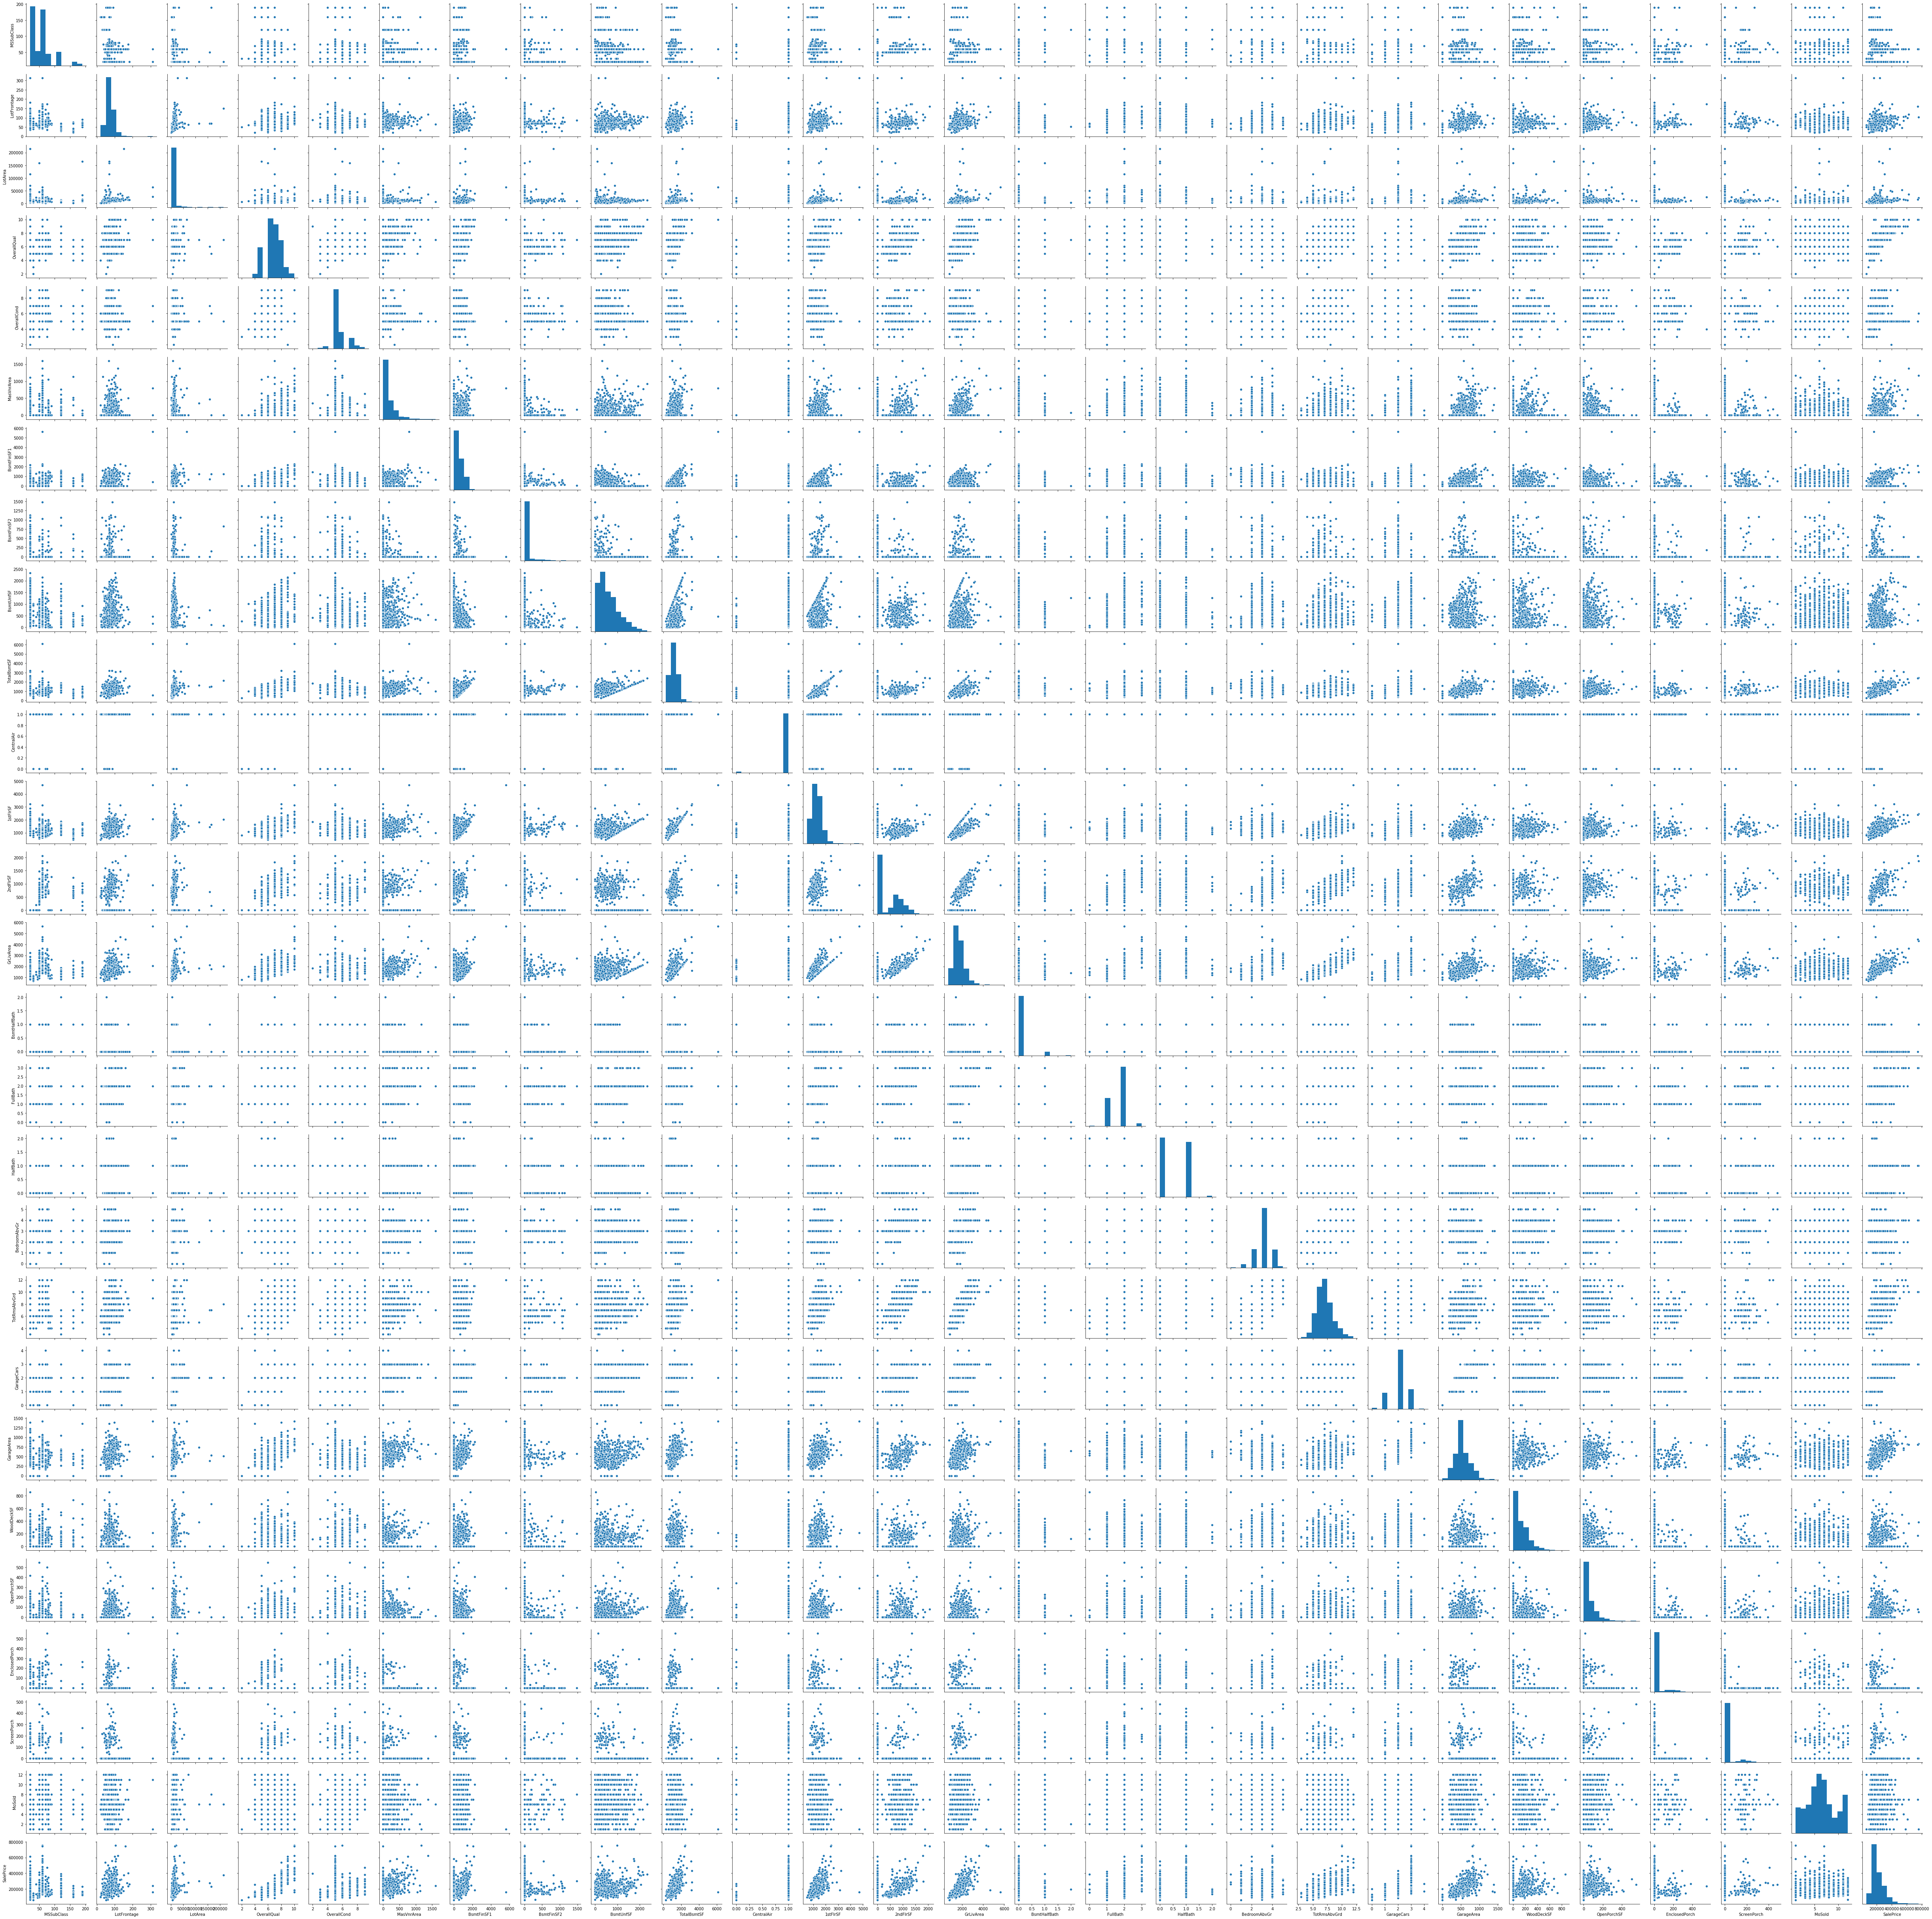

In [351]:
#Pairwise scatter plot
plt.figure(figsize = (10,8))
sns.pairplot(Frame_20)
plt.show()

# For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [243]:
Frame_400 = Frame_20.copy()

In [244]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Frame_20[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'BldgType', 'HouseStyle','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'Electrical',
       'KitchenQual','FireplaceQu','GarageFinish','PavedDrive', 'SaleType', 'SaleCondition',
       'YearBuilt_age', 'YearRemodAdd_age', 'GarageYrBlt_age', 'YrSold_age']],drop_first=True)

In [245]:
#Dropping columns whose dummy variables had been created
Frame_20.drop(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'BldgType', 'HouseStyle','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'Electrical',
       'KitchenQual','FireplaceQu','GarageFinish','PavedDrive', 'SaleType', 'SaleCondition',
       'YearBuilt_age', 'YearRemodAdd_age', 'GarageYrBlt_age', 'YrSold_age'], axis = 1, inplace = True)

In [246]:
#Merging the dataframe to create one master dataframe
Frame_30 = pd.concat([Frame_20,dummy1], axis = 1)

In [247]:
Frame_30.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond RoofStyle  \
1          20         80.0     9600            6            8     Gable   
2          60         68.0    11250            7            5     Gable   
3          70         60.0     9550            7            5     Gable   
4          60         84.0    14260            8            5     Gable   
6          20         75.0    10084            8            5     Gable   

  RoofMatl  MasVnrArea ExterCond  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1  CompShg         0.0        TA         978           0        284   
2  CompShg       162.0        TA         486           0        434   
3  CompShg         0.0        TA         216           0        540   
4  CompShg       350.0        TA         655           0        490   
6  CompShg       186.0        TA        1369           0        317   

   TotalBsmtSF Heating  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  \
1         1262    GasA           1      1262         0       1262   
2          920    GasA           1       920       866       1786   
3          756    GasA           1       961       756       1717   
4         1145    GasA           1      1145      1053       2198   
6         1686    GasA           1      1694         0       1694   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd Functional  \
1             1         2         0             3             6        Typ   
2             0         2         1             3             6        Typ   
3             0         1         0             3             7        Typ   
4             0         2         1             4             9        Typ   
6             0         2         0             3             7        Typ   

  GarageType  GarageCars  GarageArea GarageQual  WoodDeckSF  OpenPorchSF  \
1     Attchd           2         460         TA         298            0   
2     Attchd           2         608         TA           0           42   
3     Detchd           3         642         TA           0           35   
4     Attchd           3         836         TA         192           84   
6     Attchd           2         636         TA         255           57   

   EnclosedPorch  ScreenPorch  MoSold  SalePrice  MSZoning_FV  MSZoning_RL  \
1              0            0       5     181500            0            1   
2              0            0       9     223500            0            1   
3            272            0       2     140000            0            1   
4              0            0      12     250000            0            1   
6              0            0       8     307000            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
1            0             0             0             1                0   
2            0             0             0             0                0   
3            0             0             0             0                0   
4            0             0             0             0                0   
6            0             0             0             1                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   
6                0                1                  0              0   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   
6              0                 1              0              0   

   N

# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

In [248]:
# Creating dummy variables for the variable 'GarageType'
ml = pd.get_dummies(Frame_30['GarageType'], prefix='GarageType')
# Dropping GarageType_Others column
ml1 = ml.drop(['GarageType_Others'], 1)

In [249]:
#Adding the results to the master dataframe
Frame_30 = pd.concat([Frame_30,ml1], axis=1)

In [250]:
# Creating dummy variables for the variable 'GarageQual'
m2 = pd.get_dummies(Frame_30['GarageQual'], prefix='GarageQual')
# Dropping GarageQual_Others column
m21 = m2.drop(['GarageQual_Others'], 1)
#Adding the results to the master dataframe
Frame_30 = pd.concat([Frame_30,m21], axis=1)

In [251]:
# Creating dummy variables for the variable'RoofStyle'
m3 = pd.get_dummies(Frame_30['RoofStyle'], prefix='RoofStyle')
# Dropping RoofStyle_Others column
m31 = m3.drop(['RoofStyle_Others'], 1)
#Adding the results to the master dataframe
Frame_30 = pd.concat([Frame_30,m31], axis=1)

In [252]:
# Creating dummy variables for the variable 'RoofMatl'
m4 = pd.get_dummies(Frame_30['RoofMatl'], prefix='RoofMatl')
# Dropping RoofMatl_Others column
m41 = m4.drop(['RoofMatl_Others'], 1)
#Adding the results to the master dataframe
Frame_30 = pd.concat([Frame_30,m41], axis=1)

In [253]:
# Creating dummy variables for the variable 'ExterCond'
m5 = pd.get_dummies(Frame_30['ExterCond'], prefix='ExterCond')
# Dropping ExterCond_Others column
m51 = m5.drop(['ExterCond_Others'], 1)
#Adding the results to the master dataframe
Frame_30 = pd.concat([Frame_30,m51], axis=1)

In [254]:
# Creating dummy variables for the variable 'Heating'
m6 = pd.get_dummies(Frame_30['Heating'], prefix='Heating')
# Dropping Heating_Others column
m61 = m6.drop(['Heating_Others'], 1)

#Adding the results to the master dataframe
Frame_30 = pd.concat([Frame_30,m61], axis=1)

In [255]:
# Creating dummy variables for the variable 'Functional'
m7 = pd.get_dummies(Frame_30['Functional'], prefix='Functional')
# Dropping Functional_Others column
m71 = m7.drop(['Functional_Others'], 1)
#Adding the results to the master dataframe
Frame_30 = pd.concat([Frame_30,m71], axis=1)

In [256]:
#Dropping the columns whose dummy variable had been created
Frame_30.drop(['GarageType','GarageQual','RoofStyle','RoofMatl','ExterCond','Heating','Functional'], axis = 1, inplace = True)

In [257]:
Frame_30.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   
6          20         75.0    10084            8            5       186.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
1         978           0        284         1262           1      1262   
2         486           0        434          920           1       920   
3         216           0        540          756           1       961   
4         655           0        490         1145           1      1145   
6        1369           0        317         1686           1      1694   

   2ndFlrSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1         0       1262             1         2         0             3   
2       866       1786             0         2         1             3   
3       756       1717             0         1         0             3   
4      1053       2198             0         2         1             4   
6         0       1694             0         2         0             3   

   TotRmsAbvGrd  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1             6           2         460         298            0   
2             6           2         608           0           42   
3             7           3         642           0           35   
4             9           3         836         192           84   
6             7           2         636         255           57   

   EnclosedPorch  ScreenPorch  MoSold  SalePrice  MSZoning_FV  MSZoning_RL  \
1              0            0       5     181500            0            1   
2              0            0       9     223500            0            1   
3            272            0       2     140000            0            1   
4              0            0      12     250000            0            1   
6              0            0       8     307000            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
1            0             0             0             1                0   
2            0             0             0             0                0   
3            0             0             0             0                0   
4            0             0             0             0                0   
6            0             0             0             1                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   
6                0                1                  0              0   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   
6              0                 1              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   
6                     0                    0                     0   

   Neighborhood_ClearCr  Neighborh

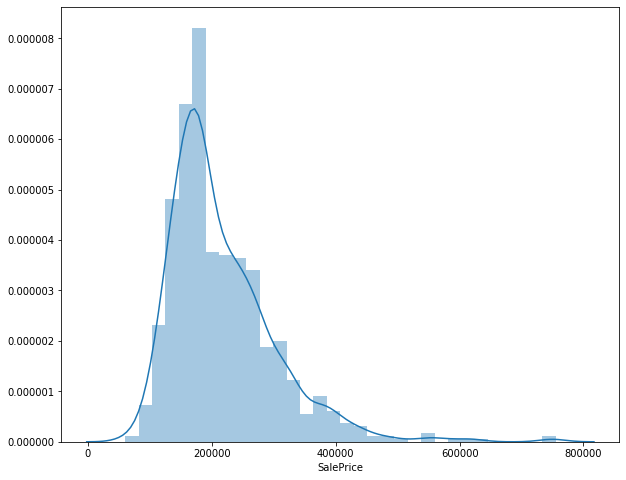

In [258]:
#Checking the distribution of target variable SalePrice
plt.figure(figsize = (10,8))
sns.distplot(Frame_30.SalePrice)
plt.show()

In [259]:
#It can be observed from the above plot that target variable is not properly distributed

In [260]:
Var46 = Housing.select_dtypes(exclude = object)
Var46.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'GarageYrBlt_1'],
      dtype='object')

# Model building and Evaluation

In [261]:
#Importing train test split
from sklearn.model_selection import train_test_split

In [262]:
#Putting target variable to y
y = Frame_30['SalePrice']

In [263]:
y.head()

1    181500
2    223500
3    140000
4    250000
6    307000
Name: SalePrice, dtype: int64

In [264]:
#Putting feature variable to X
X = Frame_30.copy()

In [265]:
X.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   
6          20         75.0    10084            8            5       186.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
1         978           0        284         1262           1      1262   
2         486           0        434          920           1       920   
3         216           0        540          756           1       961   
4         655           0        490         1145           1      1145   
6        1369           0        317         1686           1      1694   

   2ndFlrSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1         0       1262             1         2         0             3   
2       866       1786             0         2         1             3   
3       756       1717             0         1         0             3   
4      1053       2198             0         2         1             4   
6         0       1694             0         2         0             3   

   TotRmsAbvGrd  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1             6           2         460         298            0   
2             6           2         608           0           42   
3             7           3         642           0           35   
4             9           3         836         192           84   
6             7           2         636         255           57   

   EnclosedPorch  ScreenPorch  MoSold  SalePrice  MSZoning_FV  MSZoning_RL  \
1              0            0       5     181500            0            1   
2              0            0       9     223500            0            1   
3            272            0       2     140000            0            1   
4              0            0      12     250000            0            1   
6              0            0       8     307000            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
1            0             0             0             1                0   
2            0             0             0             0                0   
3            0             0             0             0                0   
4            0             0             0             0                0   
6            0             0             0             1                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   
6                0                1                  0              0   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   
6              0                 1              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   
6                     0                    0                     0   

   Neighborhood_ClearCr  Neighborh

In [266]:
#Changing y to logy as target variable is not properly distributed
y = np.log(y)

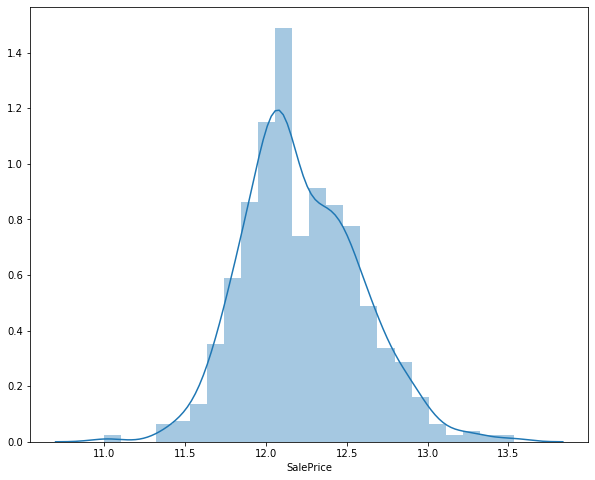

In [267]:
#Checking the distribution of target variable SalePrice again
plt.figure(figsize = (10,8))
sns.distplot(y)
plt.show()

In [268]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [269]:
#Importing standard scaler
from sklearn.preprocessing import StandardScaler

In [270]:
var50 = Housing.select_dtypes(exclude = object)

In [271]:
var51 = var50.columns

In [272]:
scl = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF','GrLivArea','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd','GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch','ScreenPorch','MoSold' ]

In [273]:
#Scaling the train set
scaler = StandardScaler()

X_train[scl] = scaler.fit_transform(X_train[scl])

X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1051   -0.954174     1.448098 -0.073324     0.240717    -0.512917   -0.699074   
1142    0.125522     0.181427 -0.154895     1.021939    -0.512917    0.891326   
478    -0.954174     0.278863 -0.109593     1.021939    -0.512917    0.872616   
997    -0.954174    -0.208318 -0.036785    -0.540505     0.503312    1.971863   
119     0.125522    -0.403191 -0.256287    -0.540505    -0.512917   -0.699074   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
1051   -1.046509   -0.291045   1.461587     0.274172           1  0.039955   
1142    1.282466   -0.291045  -0.664022     0.626785           1  0.411591   
478     1.561943   -0.291045  -0.449335     1.188615           1  1.035939   
997    -1.046509   -0.291045   1.729414     0.570367           1  0.352129   
119    -1.046509   -0.291045   0.211729    -1.108071           1 -1.416858   

      2ndFlrSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1051 -0.862254  -0.776337     -0.254213  0.550104 -0.898347      0.122625   
1142  2.045481   2.228191     -0.254213  2.464610 -0.898347      1.474060   
478  -0.862254   0.022486     -0.254213  0.550104 -0.898347      0.122625   
997  -0.862254  -0.525960     -0.254213  0.550104 -0.898347     -1.228809   
119   0.691954  -0.498140     -0.254213  0.550104  1.049299      0.122625   

      TotRmsAbvGrd  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1051     -0.617627   -0.041452   -0.489261   -0.929810    -0.540384   
1142      2.723117    1.524844    2.649061    0.007070     1.267401   
478       0.050522    1.524844    1.490138    0.629158    -0.190490   
997      -0.617627   -0.041452    0.408135    1.850849    -0.831963   
119       0.718670   -0.041452   -0.745660   -0.929810    -0.482069   

      EnclosedPorch  ScreenPorch    MoSold  SalePrice  MSZoning_FV  \
1051      -0.327643    -0.319534  1.335598     200141            0   
1142      -0.327643    -0.319534 -0.863151     424870            0   
478       -0.327643    -0.319534  0.969140     297000            0   
997       -0.327643    -0.319534 -1.596068     185000            0   
119       -0.327643    -0.319534  0.236224     163990            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1051            1            0             0             0             0   
1142            1            0             0             0             1   
478             1            0             0             0             1   
997             1            0             0             0             0   
119             1            0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
1051                0                0                1                  0   
1142                0                0                1                  0   
478                 0                0                1                  0   
997                 0                0                1                  0   
119                 0                0                1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
1051              0              0                 0              0   
1142              0              0                 1              0   
478               0              0                 1              0   
997               0              0                 1              0   
119               0              0                 1              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
1051              0                     0                    0   
1142              0                     0                    0   
478               0                     0                    0   
997               0                     0                    0   
119               0                     0               

In [274]:
#Scaling the test set
X_test[scl] = scaler.transform(X_test[scl])

In [275]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1051   -0.954174     1.448098 -0.073324     0.240717    -0.512917   -0.699074   
1142    0.125522     0.181427 -0.154895     1.021939    -0.512917    0.891326   
478    -0.954174     0.278863 -0.109593     1.021939    -0.512917    0.872616   
997    -0.954174    -0.208318 -0.036785    -0.540505     0.503312    1.971863   
119     0.125522    -0.403191 -0.256287    -0.540505    -0.512917   -0.699074   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
1051   -1.046509   -0.291045   1.461587     0.274172           1  0.039955   
1142    1.282466   -0.291045  -0.664022     0.626785           1  0.411591   
478     1.561943   -0.291045  -0.449335     1.188615           1  1.035939   
997    -1.046509   -0.291045   1.729414     0.570367           1  0.352129   
119    -1.046509   -0.291045   0.211729    -1.108071           1 -1.416858   

      2ndFlrSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1051 -0.862254  -0.776337     -0.254213  0.550104 -0.898347      0.122625   
1142  2.045481   2.228191     -0.254213  2.464610 -0.898347      1.474060   
478  -0.862254   0.022486     -0.254213  0.550104 -0.898347      0.122625   
997  -0.862254  -0.525960     -0.254213  0.550104 -0.898347     -1.228809   
119   0.691954  -0.498140     -0.254213  0.550104  1.049299      0.122625   

      TotRmsAbvGrd  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1051     -0.617627   -0.041452   -0.489261   -0.929810    -0.540384   
1142      2.723117    1.524844    2.649061    0.007070     1.267401   
478       0.050522    1.524844    1.490138    0.629158    -0.190490   
997      -0.617627   -0.041452    0.408135    1.850849    -0.831963   
119       0.718670   -0.041452   -0.745660   -0.929810    -0.482069   

      EnclosedPorch  ScreenPorch    MoSold  SalePrice  MSZoning_FV  \
1051      -0.327643    -0.319534  1.335598     200141            0   
1142      -0.327643    -0.319534 -0.863151     424870            0   
478       -0.327643    -0.319534  0.969140     297000            0   
997       -0.327643    -0.319534 -1.596068     185000            0   
119       -0.327643    -0.319534  0.236224     163990            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1051            1            0             0             0             0   
1142            1            0             0             0             1   
478             1            0             0             0             1   
997             1            0             0             0             0   
119             1            0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
1051                0                0                1                  0   
1142                0                0                1                  0   
478                 0                0                1                  0   
997                 0                0                1                  0   
119                 0                0                1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
1051              0              0                 0              0   
1142              0              0                 1              0   
478               0              0                 1              0   
997               0              0                 1              0   
119               0              0                 1              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
1051              0                     0                    0   
1142              0                     0                    0   
478               0                     0                    0   
997               0                     0                    0   
119               0                     0               

# Model Building and Evaluation

In [276]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.1,1.0, 5.0, 10.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [277]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007180      0.004008         0.001197    3.993751e-04       0.001   
1       0.003191      0.000978         0.000998    2.015166e-06        0.01   
2       0.002992      0.000631         0.000998    6.289914e-07         0.1   
3       0.004190      0.000977         0.000998    6.306759e-04           1   
4       0.003394      0.000492         0.000994    4.555230e-06           5   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.059158          -0.068277          -0.065559   
1   {'alpha': 0.01}          -0.058243          -0.067975          -0.065476   
2    {'alpha': 0.1}          -0.054962          -0.066230          -0.064301   
3    {'alpha': 1.0}          -0.051841          -0.060810          -0.059298   
4    {'alpha': 5.0}          -0.048411          -0.057075          -0.055449   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.082313          -0.077691        -0.070586        0.008359   
1          -0.080328          -0.077319        -0.069854        0.008038   
2          -0.072159          -0.074791        -0.066473        0.006908   
3          -0.059688          -0.064962        -0.059309        0.004242   
4          -0.050972          -0.057083        -0.053792        0.003501   

   rank_test_score  split0_train_score  split1_train_score  \
0                6           -0.035000           -0.032485   
1                5           -0.035070           -0.032571   
2                4           -0.035665           -0.032872   
3                3           -0.037569           -0.034571   
4                2           -0.039358           -0.036822   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.029867           -0.034324           -0.034468   
1           -0.029869           -0.034334           -0.034471   
2           -0.030096           -0.034525           -0.034554   
3           -0.031688           -0.036210           -0.035521   
4           -0.033694           -0.038840           -0.037504   

   mean_train_score  std_train_score  
0         -0.033229         0.001883  
1         -0.033263         0.001890  
2         -0.033542         0.001940  
3         -0.035112         0.001971  
4         -0.037243         0.001993

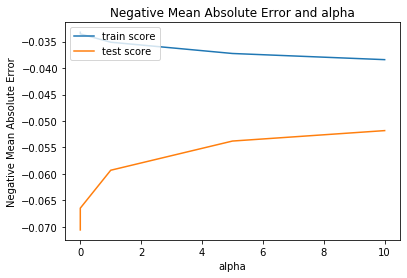

In [278]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [279]:
#Checking the best parameter for ridge model
model_cv.best_params_

{'alpha': 10.0}

In [280]:
#Using the best value of alpha
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9749625319685283
0.952945904540911


In [281]:
#Train r2 score is .974 and test r2 score is .952 which shows that our model is performing well and is not overfitting

In [282]:
lasso = Lasso()
folds = 5

hyper_param = {'alpha':[0.0001, 0.0009, 0.001,0.009]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0009, 0.001, 0.009]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [283]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.027726      0.009084         0.001197    3.991368e-04      0.0001   
1       0.006582      0.001017         0.000798    3.990890e-04      0.0009   
2       0.008374      0.002573         0.001596    1.196957e-03       0.001   
3       0.004189      0.001465         0.000997    4.862804e-07       0.009   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.051658          -0.060312          -0.057988   
1  {'alpha': 0.0009}          -0.043343          -0.054140          -0.053014   
2   {'alpha': 0.001}          -0.043052          -0.054193          -0.053209   
3   {'alpha': 0.009}          -0.050776          -0.061572          -0.061402   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.062984          -0.063489        -0.059278        0.004296   
1          -0.045065          -0.054705        -0.050045        0.004838   
2          -0.044367          -0.054836        -0.049922        0.005124   
3          -0.046447          -0.058550        -0.055744        0.006086   

   rank_test_score  split0_train_score  split1_train_score  \
0                4           -0.037280           -0.034895   
1                2           -0.042772           -0.040756   
2                1           -0.042982           -0.040973   
3                3           -0.054837           -0.052564   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.032160           -0.036320           -0.035793   
1           -0.037834           -0.043188           -0.041997   
2           -0.038289           -0.043592           -0.042267   
3           -0.052570           -0.057098           -0.053182   

   mean_train_score  std_train_score  
0         -0.035290         0.001745  
1         -0.041309         0.001925  
2         -0.041621         0.001881  
3         -0.054050         0.001736

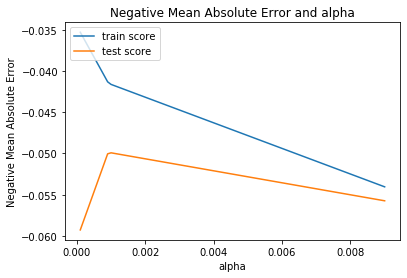

In [284]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [352]:
#Checking the best alpha value
model_cv.best_params_

{'alpha': 0.001}

In [286]:
#Using the best value of alpha
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9684667775300743
0.9547094457361338


In [287]:
#Train r2 score is .968 and test r2 score is .954 which shows that our model is performing well and is not overfitting

In [288]:
#Checking the lasso cofficents
lasso.coef_

array([ 0.00000000e+00, -1.19322384e-04,  5.54811412e-03,  2.10824294e-02,
        2.13708562e-02, -1.63691883e-03,  0.00000000e+00,  3.20726126e-03,
       -1.26879606e-03,  0.00000000e+00,  0.00000000e+00,  6.68689804e-03,
       -2.76512402e-03, -0.00000000e+00, -1.78470221e-03,  1.85677282e-03,
        6.25633899e-03,  0.00000000e+00,  9.58194938e-03,  2.07310826e-02,
        6.53599831e-03,  7.73576220e-03,  7.71723344e-03, -0.00000000e+00,
        6.68881084e-03,  3.67684209e-03,  3.33634363e-06,  0.00000000e+00,
        0.00000000e+00, -5.12283517e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.83206035e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.67809549e-03,
        4.94198599e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.84240640e-02,  0.00000000e+00,  2.22242048e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [289]:
#Calculating the rmse of lasso model
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_train1 = sqrt(mean_squared_error(y_train, y_train_pred))
rms_train1*100

6.426672499584961

In [290]:
#Above dataframe shows the best 10 variables that could be used for predicting po

In [291]:
#Creating dataframe with lasso cofficients and variables and sorting them.
cols = X_train.columns
x2 = lasso.coef_
DF_lasso = pd.DataFrame(list(zip(cols,x2)))
DF_lasso.columns = ['Variable','Values']
DF_lasso.sort_values(by='Values',ascending=False).head(10)

Variable    Values
164  YearBuilt_age_recent  0.031347
161  SaleCondition_Normal  0.029174
142        KitchenQual_Gd  0.027552
119           BsmtQual_Gd  0.024192
47   Neighborhood_Crawfor  0.022224
4             OverallCond  0.021371
3             OverallQual  0.021082
19             GarageCars  0.020731
45   Neighborhood_ClearCr  0.018424
182          ExterCond_TA  0.017239

In [292]:
#Above dataframe shows the best 10 variables that could be used for predicting price using lasso model

In [293]:
#Creating dataframe with ridge cofficients and variables and sorting them.
cols = X_train.columns
x3 = ridge.coef_
DF_ridge = pd.DataFrame(list(zip(cols,x3)))
DF_ridge.columns = ['Variables', 'Values']
DF_ridge.sort_values(by = 'Values', ascending = False).head(10)


Variables    Values
161  SaleCondition_Normal  0.038780
47   Neighborhood_Crawfor  0.030730
45   Neighborhood_ClearCr  0.028312
164  YearBuilt_age_recent  0.025571
84    Exterior1st_BrkFace  0.022823
4             OverallCond  0.021124
167   GarageYrBlt_age_old  0.020098
19             GarageCars  0.019485
142        KitchenQual_Gd  0.019242
121           BsmtCond_Gd  0.018786

In [294]:
#Above dataframe shows the best 10 variables that could be used for predicting price using ridge model

# Subjective question 1 solution

In [295]:
#Making value of alpha double
lasso2 = Lasso(alpha=0.002)
lasso2.fit(X_train,y_train)

y_train_pred1 = lasso2.predict(X_train)
y_test_pred1 = lasso2.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred1))
print(r2_score(y_true=y_test,y_pred=y_test_pred1))

0.9625514762417141
0.9515405022151019


In [296]:
#Calulating rmse value of lasso train model with double value of alpha
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_train_100 = sqrt(mean_squared_error(y_train, y_train_pred1))
rms_train_100*100

7.003567887385693

In [297]:
#Calulating rmse value of lasso test model with double value of alpha
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_test_100 = sqrt(mean_squared_error(y_test, y_test_pred1))
rms_test_100*100

7.7104128609062625

In [298]:
#Creating dataframe with lasso model cofficients and variables and sorting them.
cols = X_train.columns
x3 = lasso2.coef_
DF_lasso2 = pd.DataFrame(list(zip(cols,x3)))
DF_lasso2.columns = ['Variable','Values']
DF_lasso2.sort_values(by='Values',ascending=False).head(10)

Variable    Values
142        KitchenQual_Gd  0.031428
119           BsmtQual_Gd  0.024924
19             GarageCars  0.021769
3             OverallQual  0.021377
4             OverallCond  0.019784
161  SaleCondition_Normal  0.017363
164  YearBuilt_age_recent  0.014239
113          ExterQual_Gd  0.009778
182          ExterCond_TA  0.008913
11               1stFlrSF  0.006857

In [299]:
#Making value of alpha double for risge model
ridge2 = Ridge(alpha = 20)
ridge2.fit(X_train,y_train)

y_pred_train_200 = ridge2.predict(X_train)
print(r2_score(y_train,y_pred_train_200))

y_pred_test_200 = ridge2.predict(X_test)
print(r2_score(y_test,y_pred_test_200))


0.972888740784315
0.954632703616768


In [300]:
#Creating dataframe with ridge cofficients and variables and sorting them.
cols = X_train.columns
x3 = ridge2.coef_
DF_ridge2 = pd.DataFrame(list(zip(cols,x3)))
DF_ridge2.columns = ['Variables', 'Values']
DF_ridge2.sort_values(by = 'Values', ascending = False).head(10)


Variables    Values
161  SaleCondition_Normal  0.030459
47   Neighborhood_Crawfor  0.023070
4             OverallCond  0.021149
45   Neighborhood_ClearCr  0.020749
19             GarageCars  0.019071
164  YearBuilt_age_recent  0.018897
142        KitchenQual_Gd  0.018689
84    Exterior1st_BrkFace  0.018183
3             OverallQual  0.017815
119           BsmtQual_Gd  0.016013

In [301]:
#Calculating rmse value for train model
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_300 = sqrt(mean_squared_error(y_train, y_pred_train_200))
rms_300*100

5.95904735012395

In [302]:
#Calculating rmse value for test model
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_400 = sqrt(mean_squared_error(y_test, y_pred_test_200))
rms_400*100

7.460357309059237

In [303]:
#Frame_40 = Frame_20.copy()

In [304]:
#YearBuilt_age,SaleCondition,KitchenQual,BsmtQual,Neighborhood

# Subjective question 3 solution

In [305]:
#Dataframe 
Frame_400.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
6          20       RL         75.0    10084      Reg         Lvl    Inside   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   
6       Gtl      Somerst       Norm     1Fam     1Story            8   

   OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1            8     Gable  CompShg     MetalSd     MetalSd       None   
2            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5     Gable  CompShg     Wd Sdng     Wd Shng       None   
4            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6            5     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
6       186.0        Gd        TA      PConc       Ex       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   
6          GLQ        1369          Unf           0        317         1686   

  Heating HeatingQC  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
1    GasA        Ex           1      SBrkr      1262         0       1262   
2    GasA        Ex           1      SBrkr       920       866       1786   
3    GasA        Gd           1      SBrkr       961       756       1717   
4    GasA        Ex           1      SBrkr      1145      1053       2198   
6    GasA        Ex           1      SBrkr      1694         0       1694   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  \
1             1         2         0             3          TA             6   
2             0         2         1             3          Gd             6   
3             0         1         0             3          Gd             7   
4             0         2         1             4          Gd             9   
6             0         2         0             3          Gd             7   

  Functional FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
1        Typ          TA     Attchd          RFn           2         460   
2        Typ          TA     Attchd          RFn           2         608   
3        Typ          Gd     Detchd          Unf           3         642   
4        Typ          TA     Attchd          RFn           3         836   
6        Typ          Gd     Attchd          RFn           2         636   

  GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
1         TA          Y         298            0              0            0   
2         TA          Y           0           42              0            0   
3         TA          Y           0           35            272            0 

In [306]:
#Creating dummies for categorical columns
dummy10 = pd.get_dummies(Frame_400[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Condition1', 'BldgType', 'HouseStyle','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','FireplaceQu','GarageFinish','PavedDrive','SaleType','YearRemodAdd_age','GarageYrBlt_age','YrSold_age']],drop_first=True)

In [307]:
#Dropping columns whose categorical has been created
Frame_400.drop(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Condition1', 'BldgType', 'HouseStyle','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','FireplaceQu','GarageFinish','PavedDrive','SaleType','YearRemodAdd_age','GarageYrBlt_age','YrSold_age'],axis = 1, inplace = True)

In [308]:
#Concating dataframe
Frame_400 = pd.concat([Frame_400,dummy10],axis = 1)

In [309]:
#Creating dummy variable for variable that needs to be dropped as per question
dummy20 = pd.get_dummies(Frame_400[['YearBuilt_age','SaleCondition','KitchenQual','BsmtQual','Neighborhood']])

In [310]:
#Dropping columns that needs to be dropped as per question
dummy20.drop(['YearBuilt_age_recent','SaleCondition_Normal','KitchenQual_Gd','BsmtQual_Gd','Neighborhood_Crawfor'],axis = 1, inplace = True)

In [311]:
#Concating the dataframe
Frame_400 = pd.concat([Frame_400,dummy20], axis = 1)

In [312]:
#Dropping the columns whose dummies has been created
Frame_400.drop(['YearBuilt_age','SaleCondition','KitchenQual','BsmtQual','Neighborhood'],axis = 1, inplace = True)

In [313]:
# Creating dummy variables for the variable 'GarageType'
ml0 = pd.get_dummies(Frame_400['GarageType'], prefix='GarageType')
# Dropping GarageType_Others column
m50 = ml0.drop(['GarageType_Others'], 1)

In [314]:
#Adding the results to the master dataframe
Frame_400 = pd.concat([Frame_400,m50], axis=1)

In [315]:
# Creating dummy variables for the variable 'GarageQual'
m20 = pd.get_dummies(Frame_400['GarageQual'], prefix='GarageQual')
# Dropping GarageQual_Others column
m60 = m20.drop(['GarageQual_Others'], 1)
#Adding the results to the master dataframe
Frame_400 = pd.concat([Frame_400,m60], axis=1)

In [316]:
# Creating dummy variables for the variable'RoofStyle'
m30 = pd.get_dummies(Frame_400['RoofStyle'], prefix='RoofStyle')
# Dropping RoofStyle_Others column
m70 = m30.drop(['RoofStyle_Others'], 1)
#Adding the results to the master dataframe
Frame_400 = pd.concat([Frame_400,m70], axis=1)

In [317]:
# Creating dummy variables for the variable 'RoofMatl'
m40 = pd.get_dummies(Frame_400['RoofMatl'], prefix='RoofMatl')
# Dropping RoofMatl_Others column
m80 = m40.drop(['RoofMatl_Others'], 1)
#Adding the results to the master dataframe
Frame_400 = pd.concat([Frame_400,m80], axis=1)

In [318]:
# Creating dummy variables for the variable 'ExterCond'
m50 = pd.get_dummies(Frame_400['ExterCond'], prefix='ExterCond')
# Dropping ExterCond_Others column
m90 = m50.drop(['ExterCond_Others'], 1)
#Adding the results to the master dataframe
Frame_400 = pd.concat([Frame_400,m90], axis=1)

In [319]:
# Creating dummy variables for the variable 'Heating'
m600 = pd.get_dummies(Frame_400['Heating'], prefix='Heating')
# Dropping Heating_Others column
m610 = m600.drop(['Heating_Others'], 1)

#Adding the results to the master dataframe
Frame_400 = pd.concat([Frame_400,m610], axis=1)

In [320]:
# Creating dummy variables for the variable 'Functional'
m700 = pd.get_dummies(Frame_400['Functional'], prefix='Functional')
# Dropping Functional_Others column
m710 = m700.drop(['Functional_Others'], 1)
#Adding the results to the master dataframe
Frame_400 = pd.concat([Frame_400,m710], axis=1)

In [321]:
#Dropping the columns whose dummy variable had been created
Frame_400.drop(['GarageType','GarageQual','RoofStyle','RoofMatl','ExterCond','Heating','Functional'], axis = 1, inplace = True)

In [322]:
#Importing train test split
from sklearn.model_selection import train_test_split

In [323]:
#Putting target variable to y
y10 = Frame_400['SalePrice']

In [324]:
#Putting feature variable to X
X1 = Frame_400.copy()

In [325]:
X1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   
6          20         75.0    10084            8            5       186.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
1         978           0        284         1262           1      1262   
2         486           0        434          920           1       920   
3         216           0        540          756           1       961   
4         655           0        490         1145           1      1145   
6        1369           0        317         1686           1      1694   

   2ndFlrSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1         0       1262             1         2         0             3   
2       866       1786             0         2         1             3   
3       756       1717             0         1         0             3   
4      1053       2198             0         2         1             4   
6         0       1694             0         2         0             3   

   TotRmsAbvGrd  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1             6           2         460         298            0   
2             6           2         608           0           42   
3             7           3         642           0           35   
4             9           3         836         192           84   
6             7           2         636         255           57   

   EnclosedPorch  ScreenPorch  MoSold  SalePrice  MSZoning_FV  MSZoning_RL  \
1              0            0       5     181500            0            1   
2              0            0       9     223500            0            1   
3            272            0       2     140000            0            1   
4              0            0      12     250000            0            1   
6              0            0       8     307000            0            1   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
1            0             0             0             1                0   
2            0             0             0             0                0   
3            0             0             0             0                0   
4            0             0             0             0                0   
6            0             0             0             1                0   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
1                0                1                  0              1   
2                0                1                  0              0   
3                0                1                  0              0   
4                0                1                  0              1   
6                0                1                  0              0   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   
6              0                 1              0              0   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
1                 1                0                0                0   
2                 0                1                0                0   
3                 0                1                0                0   
4                 0                1                0                0   
6                 0                1                0                0   

   Conditi

In [326]:
#Changing y to logy as target variable is not properly distributed
y10 = np.log(y10)

In [327]:
y10.head()

1    12.109011
2    12.317167
3    11.849398
4    12.429216
6    12.634603
Name: SalePrice, dtype: float64

In [328]:
# Splitting the data into train and test
X1_train, X1_test, y10_train, y10_test = train_test_split(X1, y10, train_size=0.7, test_size=0.3, random_state=100)

In [329]:
#Importing standard scaler
from sklearn.preprocessing import StandardScaler

In [330]:
sc2 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF','GrLivArea','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd','GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch','ScreenPorch','MoSold' ]

In [331]:
#Scaling the train set
scaler = StandardScaler()

X1_train[sc2] = scaler.fit_transform(X1_train[sc2])

X1_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1051   -0.954174     1.448098 -0.073324     0.240717    -0.512917   -0.699074   
1142    0.125522     0.181427 -0.154895     1.021939    -0.512917    0.891326   
478    -0.954174     0.278863 -0.109593     1.021939    -0.512917    0.872616   
997    -0.954174    -0.208318 -0.036785    -0.540505     0.503312    1.971863   
119     0.125522    -0.403191 -0.256287    -0.540505    -0.512917   -0.699074   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
1051   -1.046509   -0.291045   1.461587     0.274172           1  0.039955   
1142    1.282466   -0.291045  -0.664022     0.626785           1  0.411591   
478     1.561943   -0.291045  -0.449335     1.188615           1  1.035939   
997    -1.046509   -0.291045   1.729414     0.570367           1  0.352129   
119    -1.046509   -0.291045   0.211729    -1.108071           1 -1.416858   

      2ndFlrSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1051 -0.862254  -0.776337     -0.254213  0.550104 -0.898347      0.122625   
1142  2.045481   2.228191     -0.254213  2.464610 -0.898347      1.474060   
478  -0.862254   0.022486     -0.254213  0.550104 -0.898347      0.122625   
997  -0.862254  -0.525960     -0.254213  0.550104 -0.898347     -1.228809   
119   0.691954  -0.498140     -0.254213  0.550104  1.049299      0.122625   

      TotRmsAbvGrd  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1051     -0.617627   -0.041452   -0.489261   -0.929810    -0.540384   
1142      2.723117    1.524844    2.649061    0.007070     1.267401   
478       0.050522    1.524844    1.490138    0.629158    -0.190490   
997      -0.617627   -0.041452    0.408135    1.850849    -0.831963   
119       0.718670   -0.041452   -0.745660   -0.929810    -0.482069   

      EnclosedPorch  ScreenPorch    MoSold  SalePrice  MSZoning_FV  \
1051      -0.327643    -0.319534  1.335598     200141            0   
1142      -0.327643    -0.319534 -0.863151     424870            0   
478       -0.327643    -0.319534  0.969140     297000            0   
997       -0.327643    -0.319534 -1.596068     185000            0   
119       -0.327643    -0.319534  0.236224     163990            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1051            1            0             0             0             0   
1142            1            0             0             0             1   
478             1            0             0             0             1   
997             1            0             0             0             0   
119             1            0             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
1051                0                0                1                  0   
1142                0                0                1                  0   
478                 0                0                1                  0   
997                 0                0                1                  0   
119                 0                0                1                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
1051              0              0                 0              0   
1142              0              0                 1              0   
478               0              0                 1              0   
997               0              0                 1              0   
119               0              0                 1              0   

      LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
1051              0                 0                1                0   
1142              0                 0                1                0   
478               0                 0                1                0   
997               0                 0                0                1   
119        

In [332]:
#Scaling the test set
X1_test[sc2] = scaler.transform(X1_test[sc2])

In [333]:
lasso10 = Lasso()
folds = 5

hyper_param = {'alpha':[0.0001, 0.0009, 0.001,0.009]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X1_train,y10_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0009, 0.001, 0.009]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [334]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.026133      0.012964         0.001795        0.000748      0.0001   
1       0.006184      0.000399         0.001197        0.000399      0.0009   
2       0.006981      0.001668         0.001596        0.000798       0.001   
3       0.003390      0.000488         0.000599        0.000489       0.009   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.051563          -0.059764          -0.058289   
1  {'alpha': 0.0009}          -0.043261          -0.057584          -0.054669   
2   {'alpha': 0.001}          -0.042853          -0.057741          -0.054887   
3   {'alpha': 0.009}          -0.052801          -0.063416          -0.063616   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.063770          -0.064913        -0.059650        0.004730   
1          -0.044508          -0.056631        -0.051320        0.006166   
2          -0.043534          -0.056861        -0.051164        0.006587   
3          -0.049465          -0.059178        -0.057692        0.005691   

   rank_test_score  split0_train_score  split1_train_score  \
0                4           -0.037623           -0.035546   
1                2           -0.043645           -0.041068   
2                1           -0.043837           -0.041257   
3                3           -0.057297           -0.054105   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.032436           -0.036367           -0.035849   
1           -0.038000           -0.043477           -0.042444   
2           -0.038398           -0.043901           -0.042741   
3           -0.053842           -0.058978           -0.056090   

   mean_train_score  std_train_score  
0         -0.035564         0.001717  
1         -0.041727         0.002078  
2         -0.042027         0.002052  
3         -0.056062         0.001938

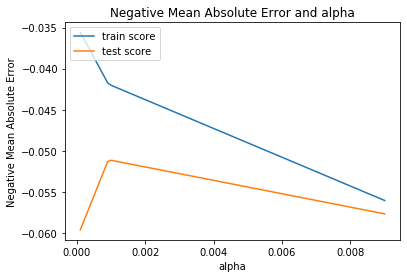

In [335]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [336]:
#Checking the best alpha value
model_cv.best_params_

{'alpha': 0.001}

In [337]:
#Using the best value of alpha
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9684667775300743
0.9547094457361338


In [338]:
#Train r2 score is .968 and test r2 score is .954 which shows that our model is performing well and is not overfitting

In [339]:
#Checking the lasso cofficents
lasso.coef_

array([ 0.00000000e+00, -1.19322384e-04,  5.54811412e-03,  2.10824294e-02,
        2.13708562e-02, -1.63691883e-03,  0.00000000e+00,  3.20726126e-03,
       -1.26879606e-03,  0.00000000e+00,  0.00000000e+00,  6.68689804e-03,
       -2.76512402e-03, -0.00000000e+00, -1.78470221e-03,  1.85677282e-03,
        6.25633899e-03,  0.00000000e+00,  9.58194938e-03,  2.07310826e-02,
        6.53599831e-03,  7.73576220e-03,  7.71723344e-03, -0.00000000e+00,
        6.68881084e-03,  3.67684209e-03,  3.33634363e-06,  0.00000000e+00,
        0.00000000e+00, -5.12283517e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.83206035e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.67809549e-03,
        4.94198599e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.84240640e-02,  0.00000000e+00,  2.22242048e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [340]:
#Creating dataframe with lasso cofficients and variables and sorting them.
cols2 = X1_train.columns
x20 = lasso.coef_
DF_lasso20 = pd.DataFrame(list(zip(cols2,x20)))
DF_lasso20.columns = ['Variable','Values']
DF_lasso20.sort_values(by='Values',ascending=False).head(10)

Variable    Values
164    Neighborhood_SWISU  0.031347
161  Neighborhood_NoRidge  0.029174
142        KitchenQual_Fa  0.027552
119      GarageFinish_Unf  0.024192
47        Condition1_RRAn  0.022224
4             OverallCond  0.021371
3             OverallQual  0.021082
19             GarageCars  0.020731
45        Condition1_PosN  0.018424
182          ExterCond_TA  0.017239